#### Setup

In [1]:
from analysis.visualization.characterisation.clustering import cluster_timeseries_usage, usage_probabilities
from analysis.visualization.characterisation.notebooks.notebook_config import (
    dl,
    FEATURES,
    N_CLUSTERS,
    DATASET_START,
    DATASET_END,
    TIME_SERIES_MODE,
    WINDOW_MONTHS,
)

usage = cluster_timeseries_usage(
    loader=dl,
    k=N_CLUSTERS,
    features=FEATURES,
    start=DATASET_START,
    end=DATASET_END,
    mode=TIME_SERIES_MODE,
    window_months=WINDOW_MONTHS
)

usage_probs = usage_probabilities(usage).sort(["station", "probability"], descending=True)


Perform Clustering in Interval 2016-01-01 until 2016-01-01
Perform Clustering in Interval 2016-02-01 until 2016-02-01
Perform Clustering in Interval 2016-03-01 until 2016-03-01
Perform Clustering in Interval 2016-04-01 until 2016-04-01
Perform Clustering in Interval 2016-05-01 until 2016-05-01
Perform Clustering in Interval 2016-06-01 until 2016-06-01
Perform Clustering in Interval 2016-07-01 until 2016-07-01
Perform Clustering in Interval 2016-08-01 until 2016-08-01
Perform Clustering in Interval 2016-09-01 until 2016-09-01
Perform Clustering in Interval 2016-10-01 until 2016-10-01
Perform Clustering in Interval 2016-11-01 until 2016-11-01
Perform Clustering in Interval 2016-12-01 until 2016-12-01
Perform Clustering in Interval 2017-01-01 until 2017-01-01
Perform Clustering in Interval 2017-02-01 until 2017-02-01
Perform Clustering in Interval 2017-03-01 until 2017-03-01
Perform Clustering in Interval 2017-04-01 until 2017-04-01
Perform Clustering in Interval 2017-05-01 until 2017-05-

# 7. Impact of Public Holidays

### Public Holiday vs No Public Holiday
This are all public holidays.

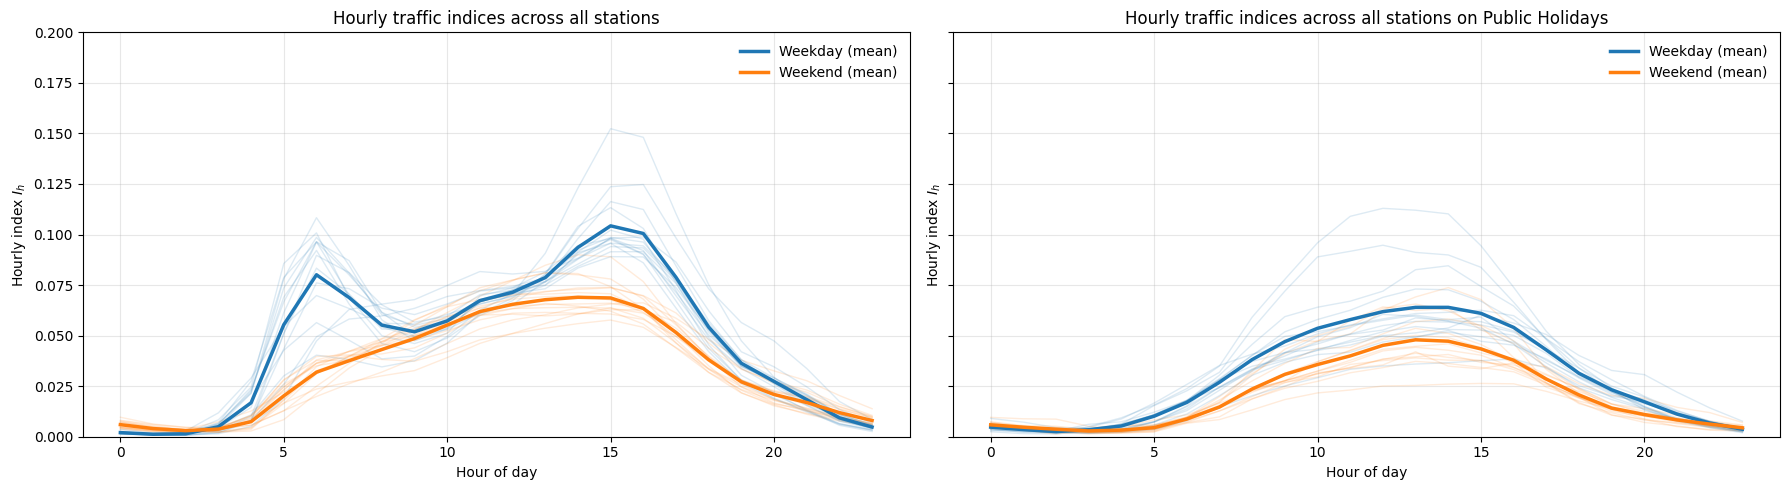

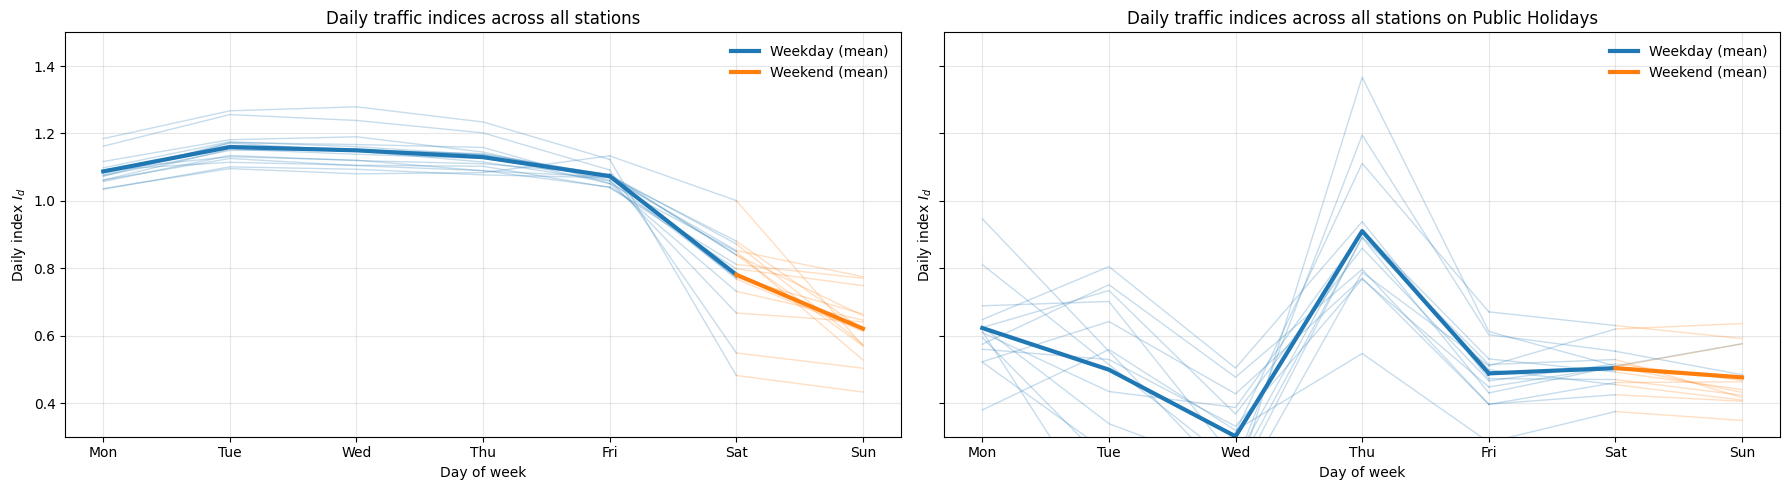

In [2]:
from analysis.visualization.characterisation.plotting import plot_hourly_indices_all_subplots, plot_daily_indices_all_subplots
from analysis.visualization.characterisation.plotting import plot_hourly_indices_subplots, plot_daily_indices_subplots

intervals = dl.get_all_holiday_intervals(school_vacation=False)

plot_hourly_indices_all_subplots(
    dl,
    filter_dates=intervals,
    title_1="Hourly traffic indices across all stations",
    title_2="Hourly traffic indices across all stations on Public Holidays"
)

plot_daily_indices_all_subplots(
    dl,
    filter_dates=intervals,
    title_1="Daily traffic indices across all stations",
    title_2="Daily traffic indices across all stations on Public Holidays"
)

As expected, public holidays should behave as weekends, but there is more activity which clearly allows the conclusion, that at least some public holidays seem to be
special and enforce more people to go out.

But the weekly plot ???

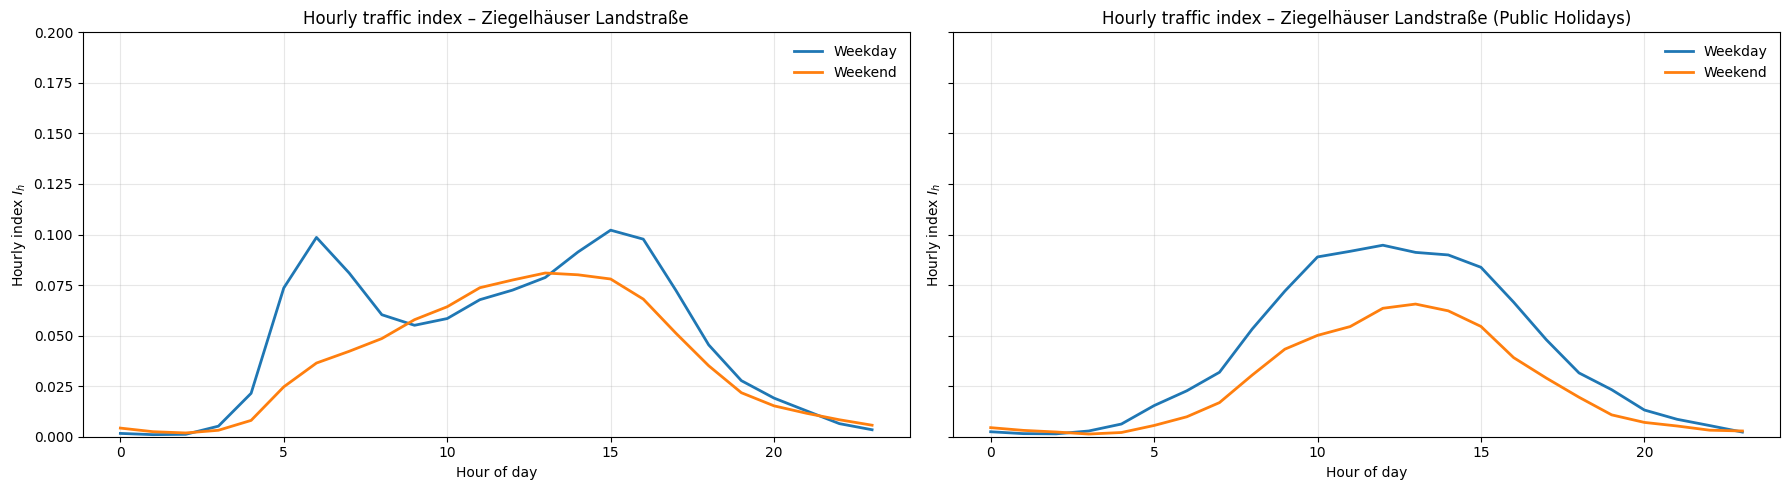

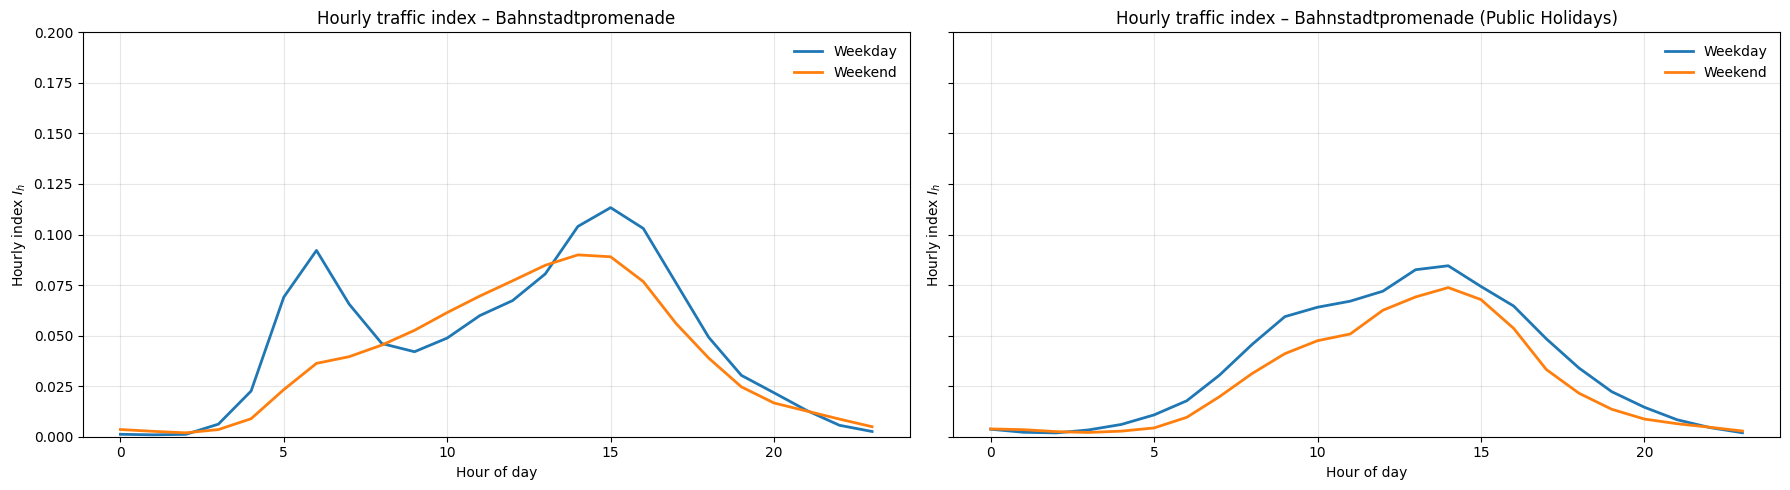

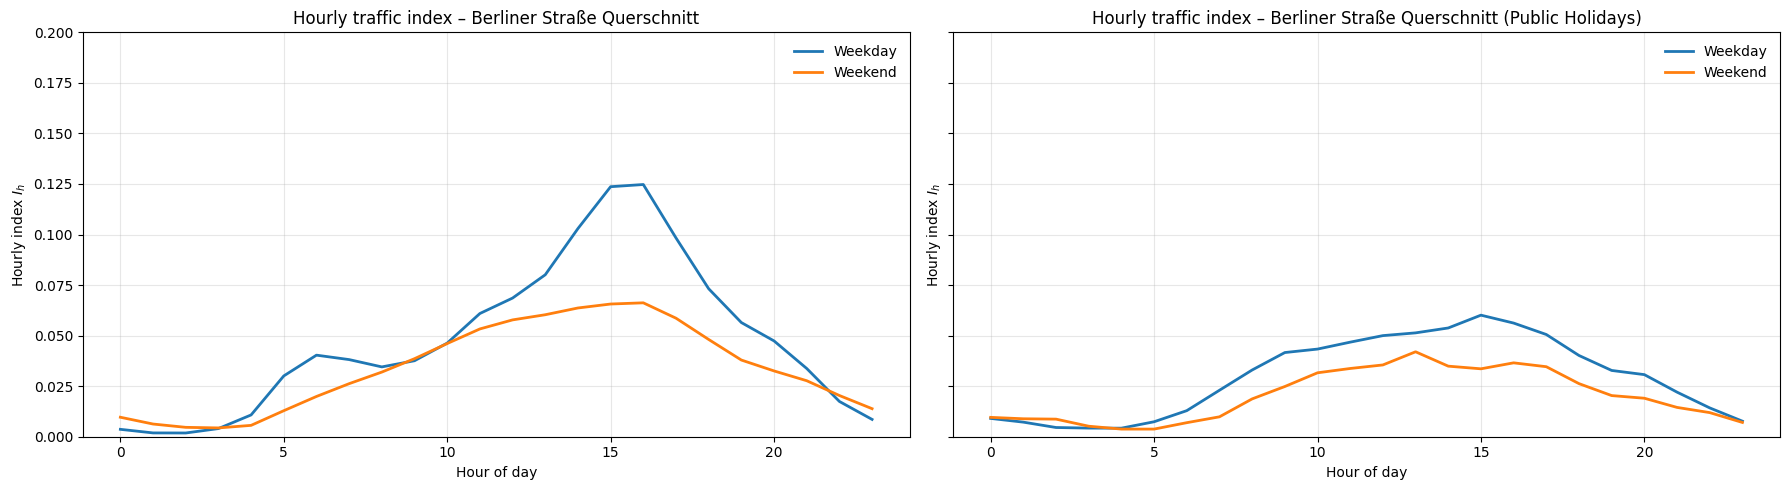

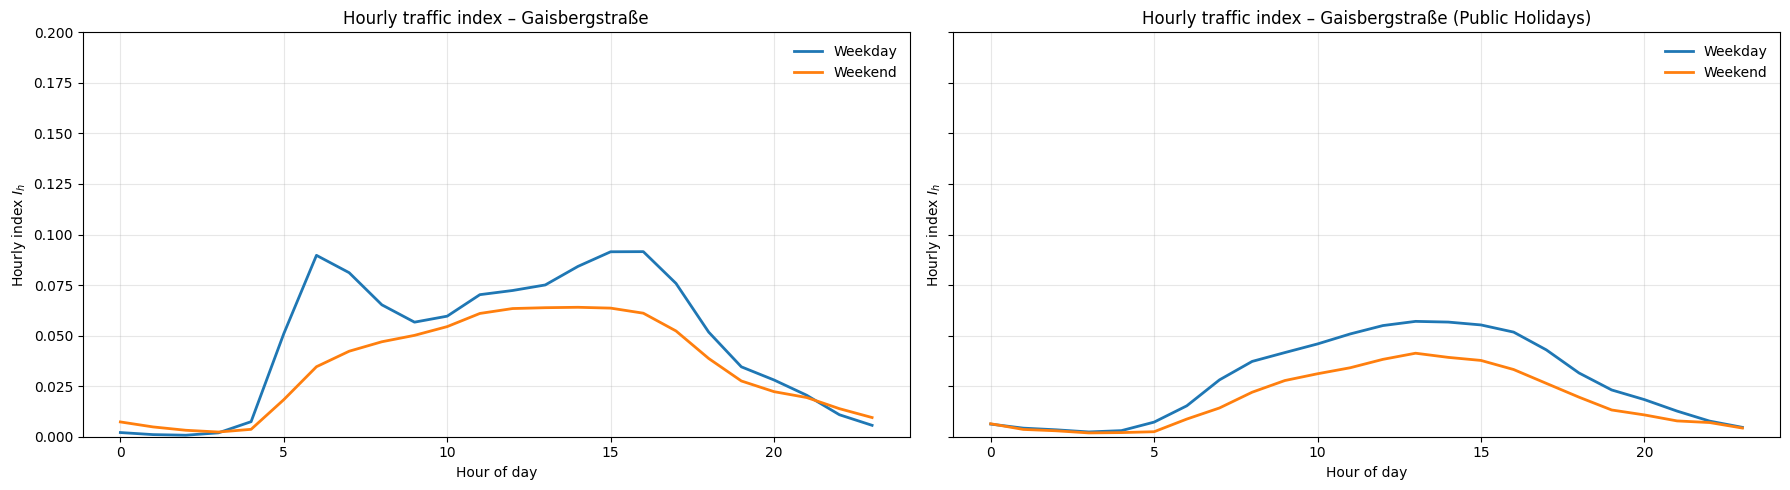

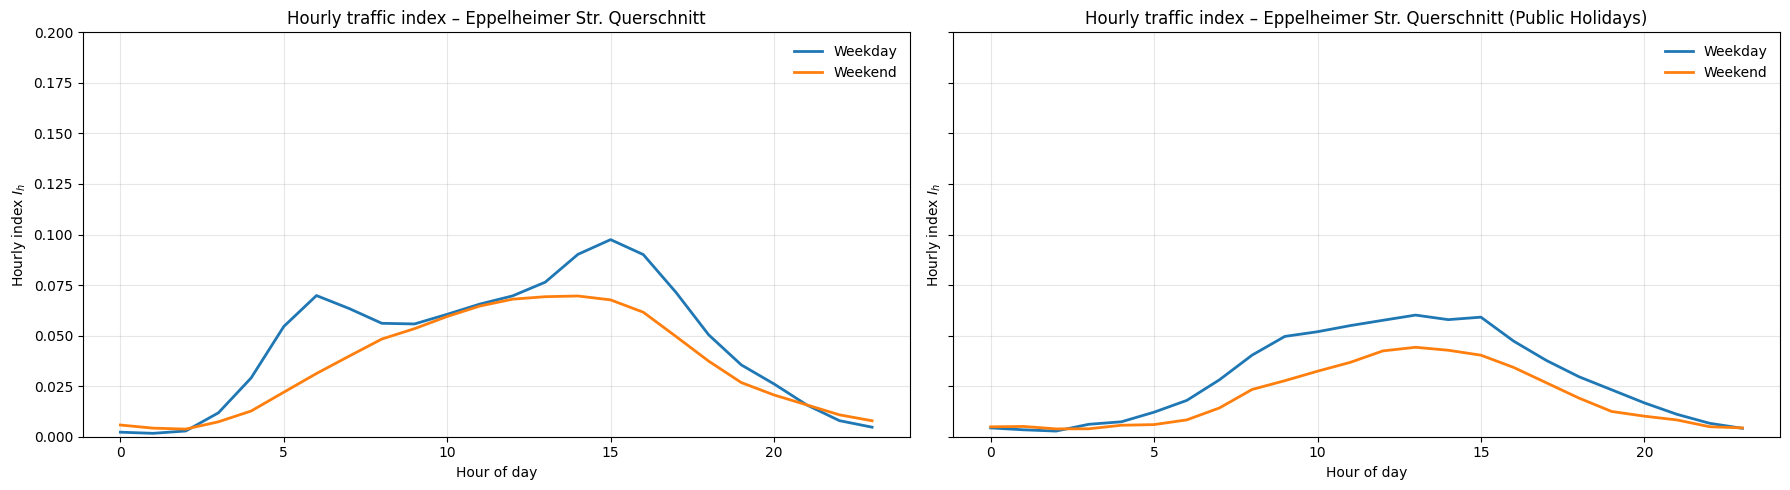

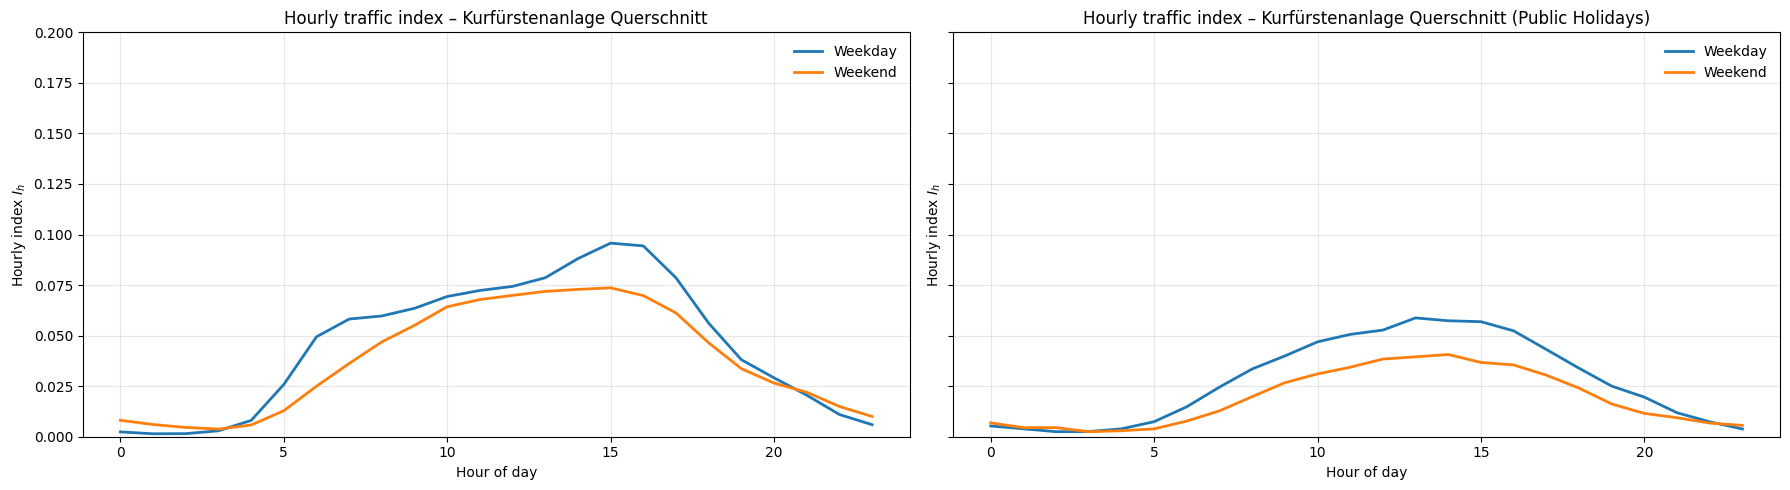

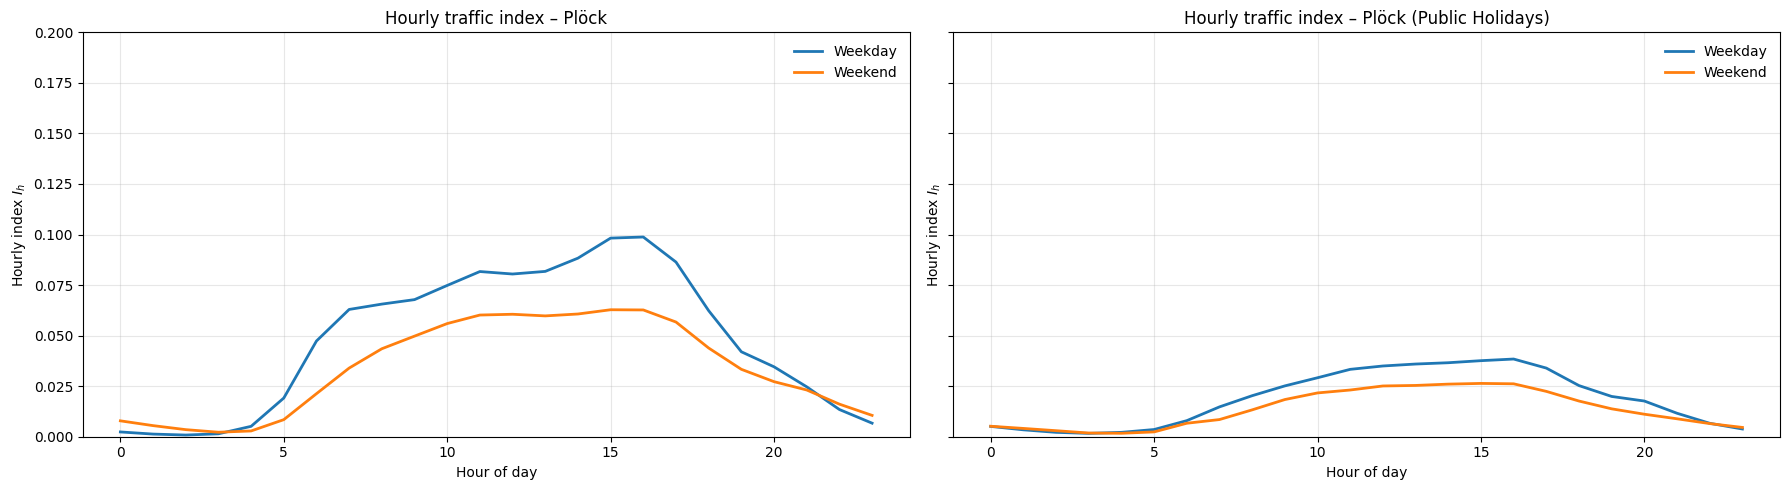

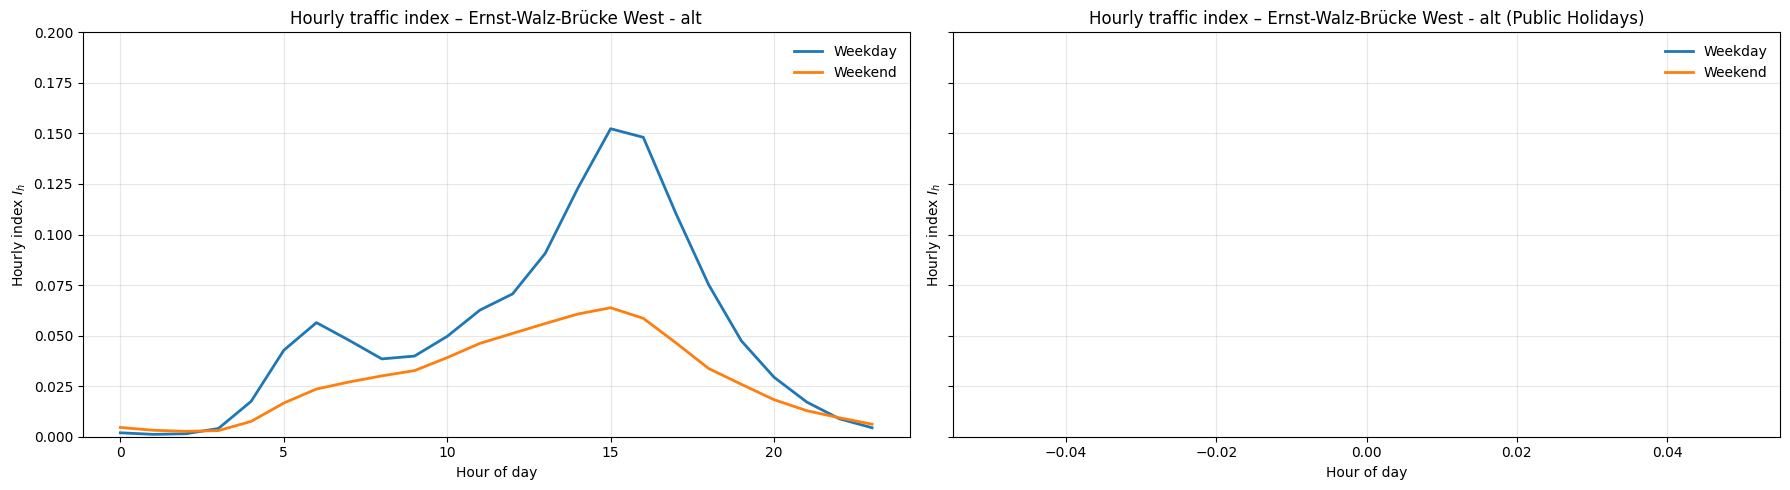

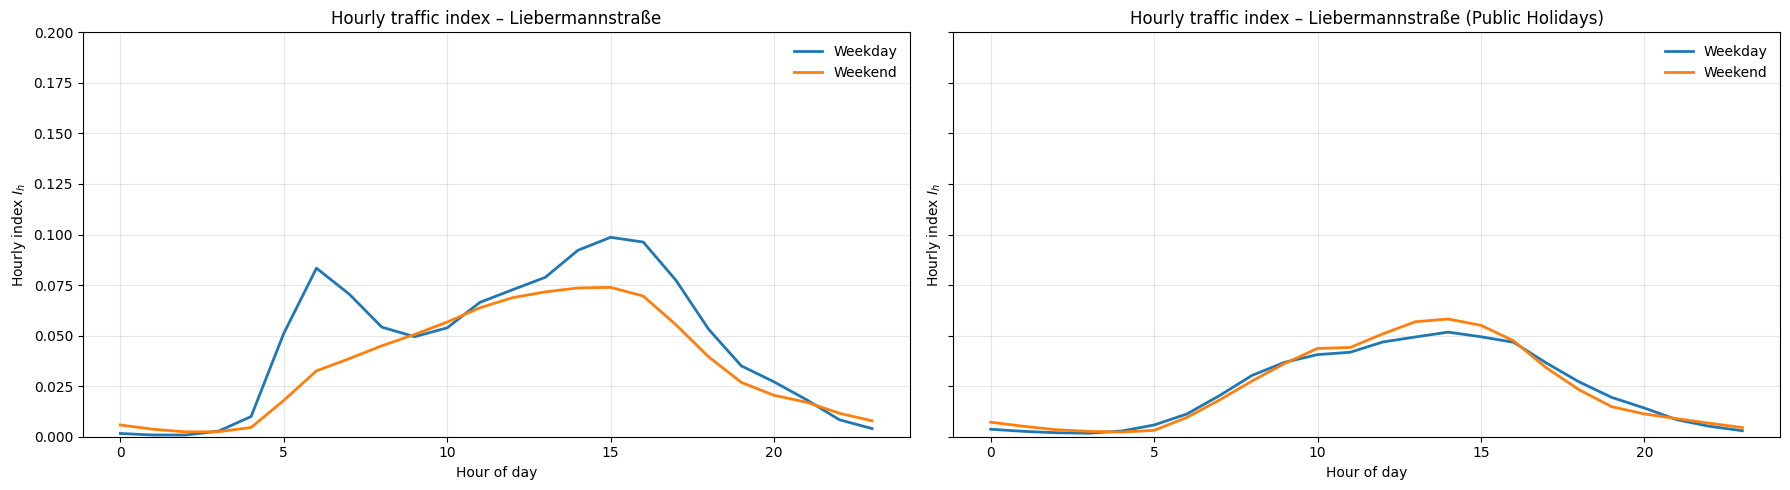

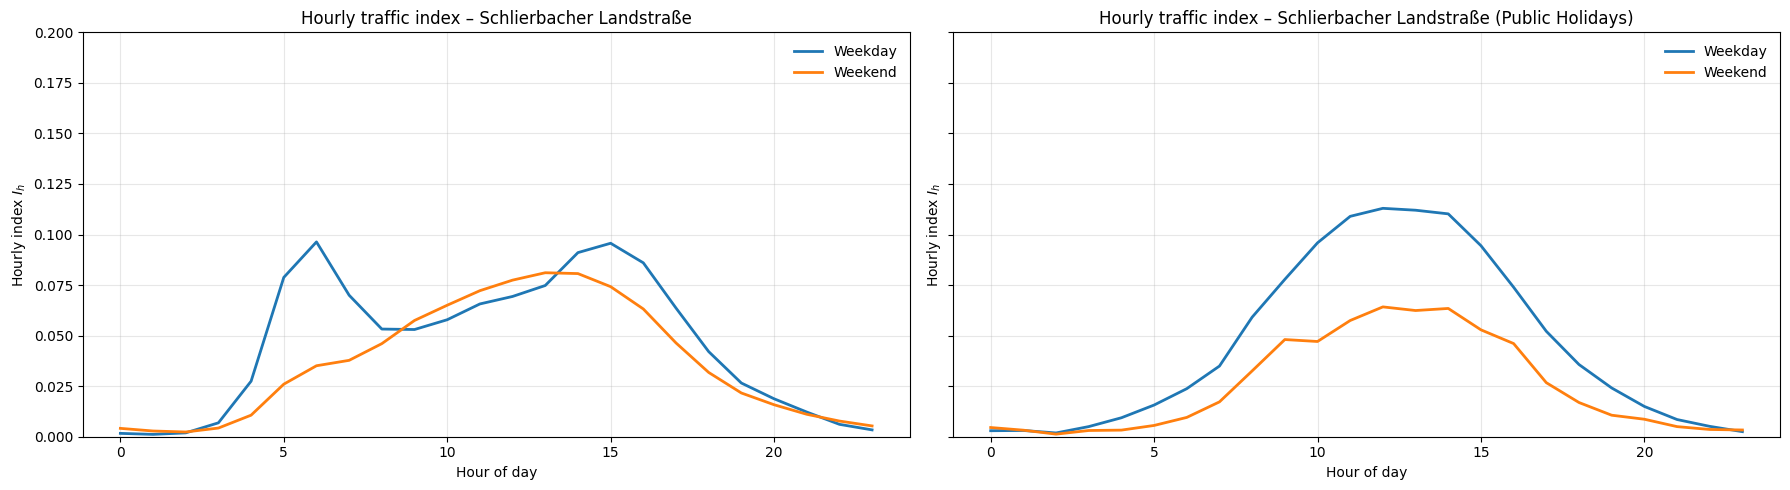

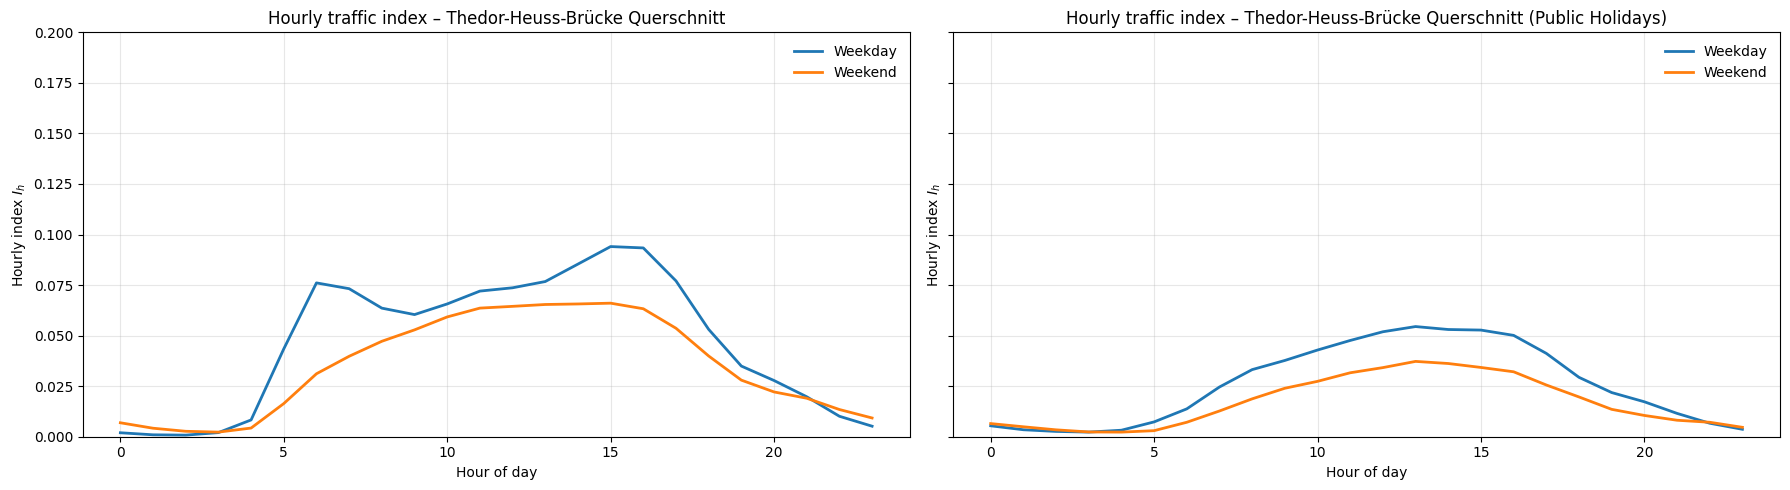

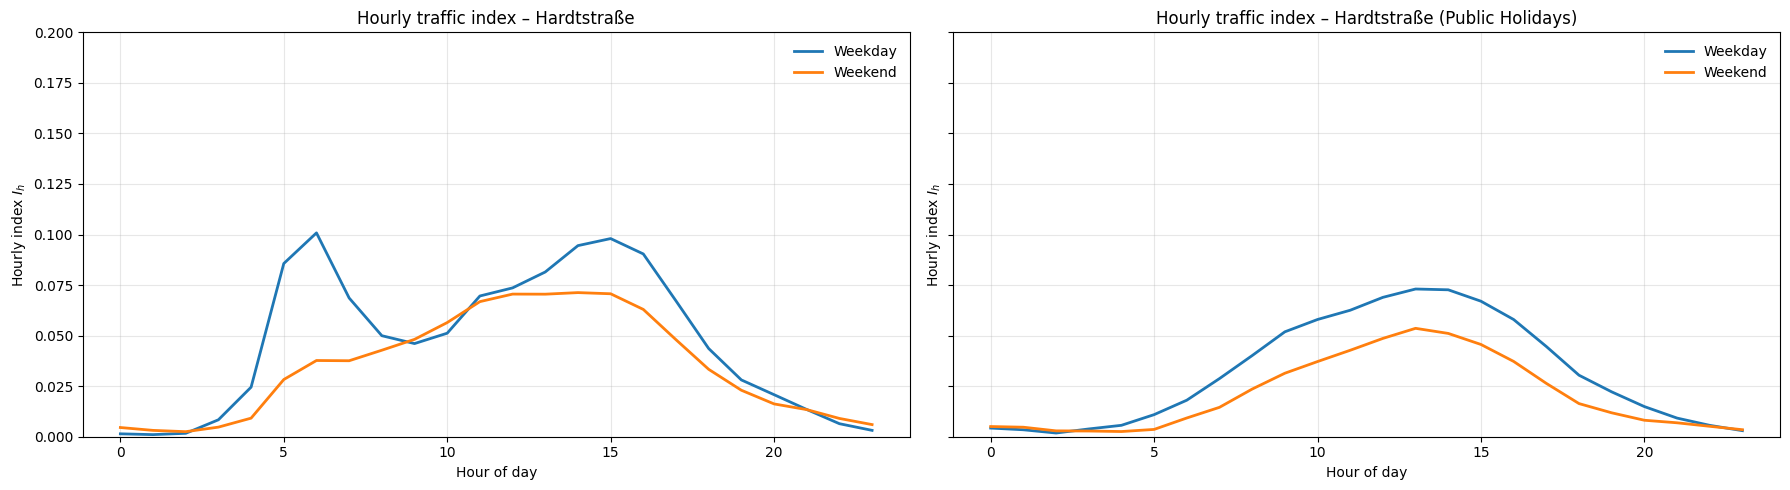

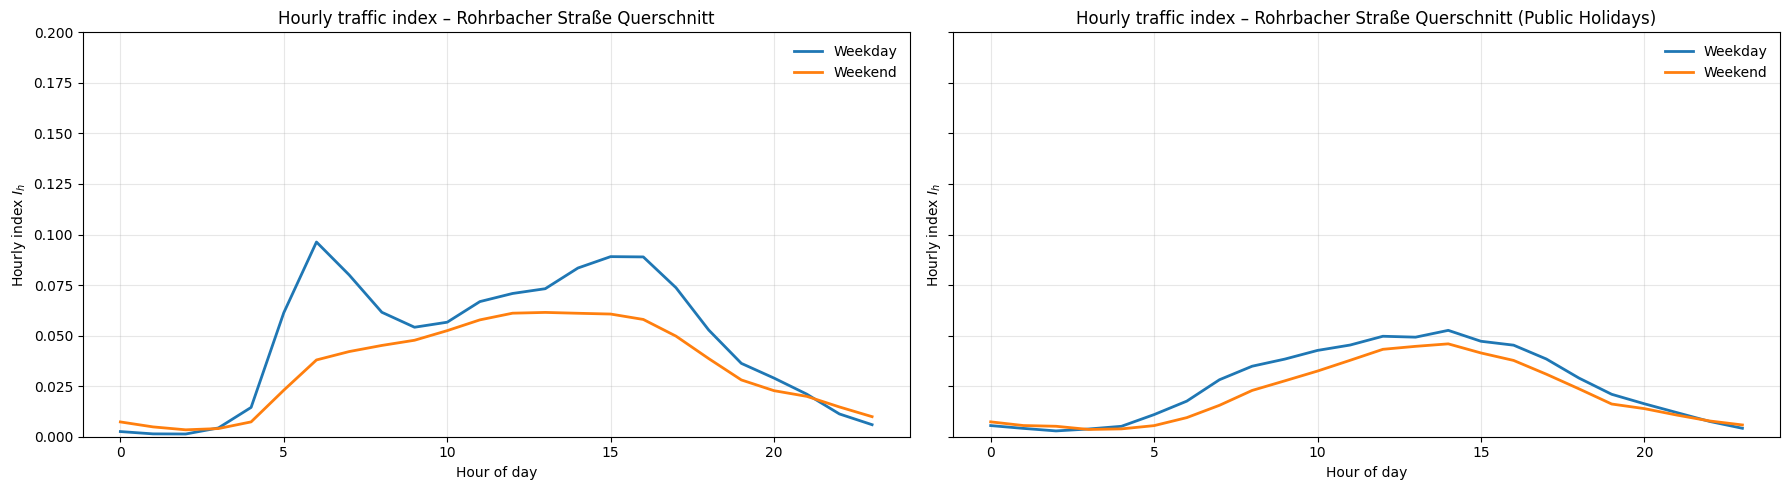

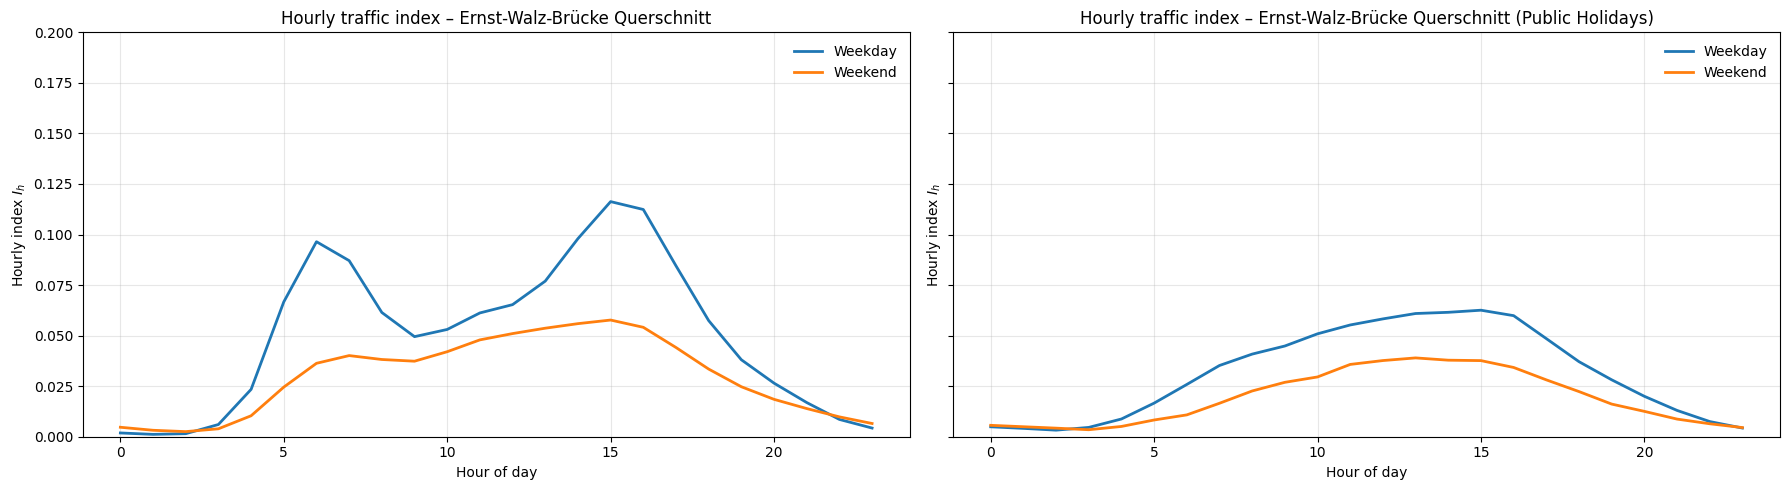

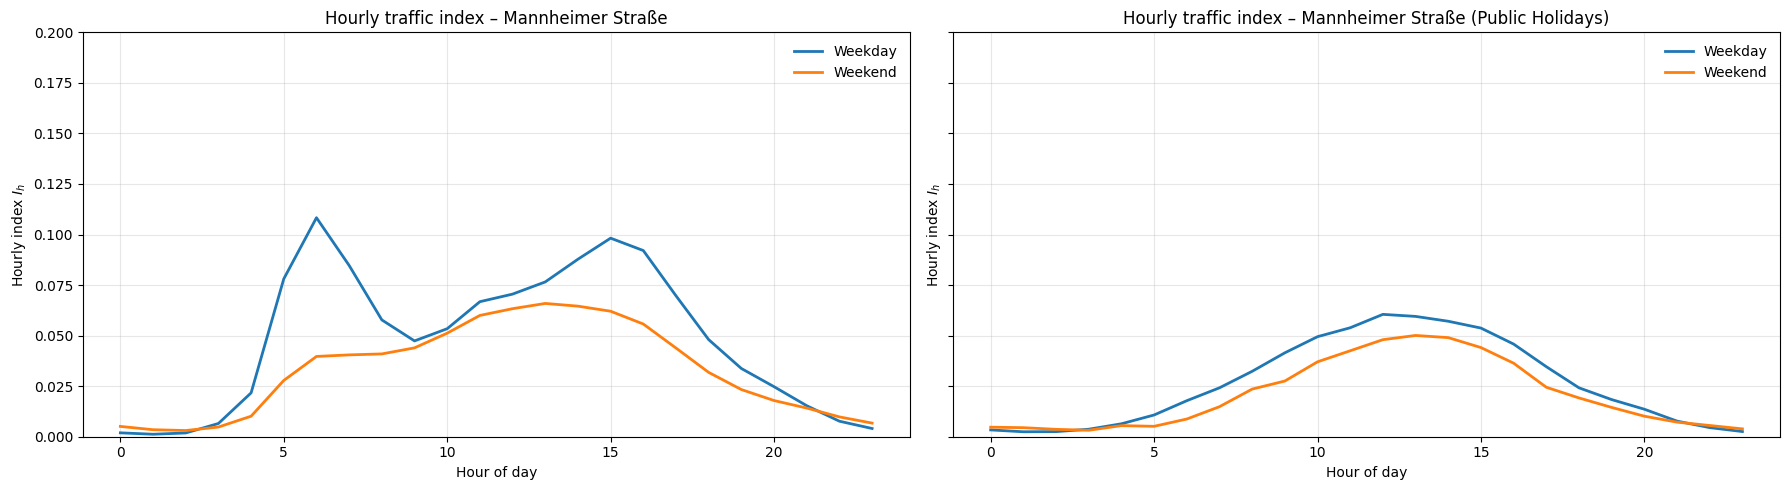

In [3]:
for station in dl.get_bicyle_stations():
  plot_hourly_indices_subplots(loader=dl, station_name=station, channel="channels_all", interval=None, ylim=(0, 0.2), show_metrics=False, title_1=None, title_2="(Public Holidays)", filter_dates=intervals)
  # plot_daily_indices_subplots(loader=dl, station_name=station, channel="channels_all", interval=None, ylim=(0, 0.2), title_1=None, title_2="(Public Holidays)", filter_dates=intervals)
  # does not work correctly

### Summer Holidays vs No Summer Holidays

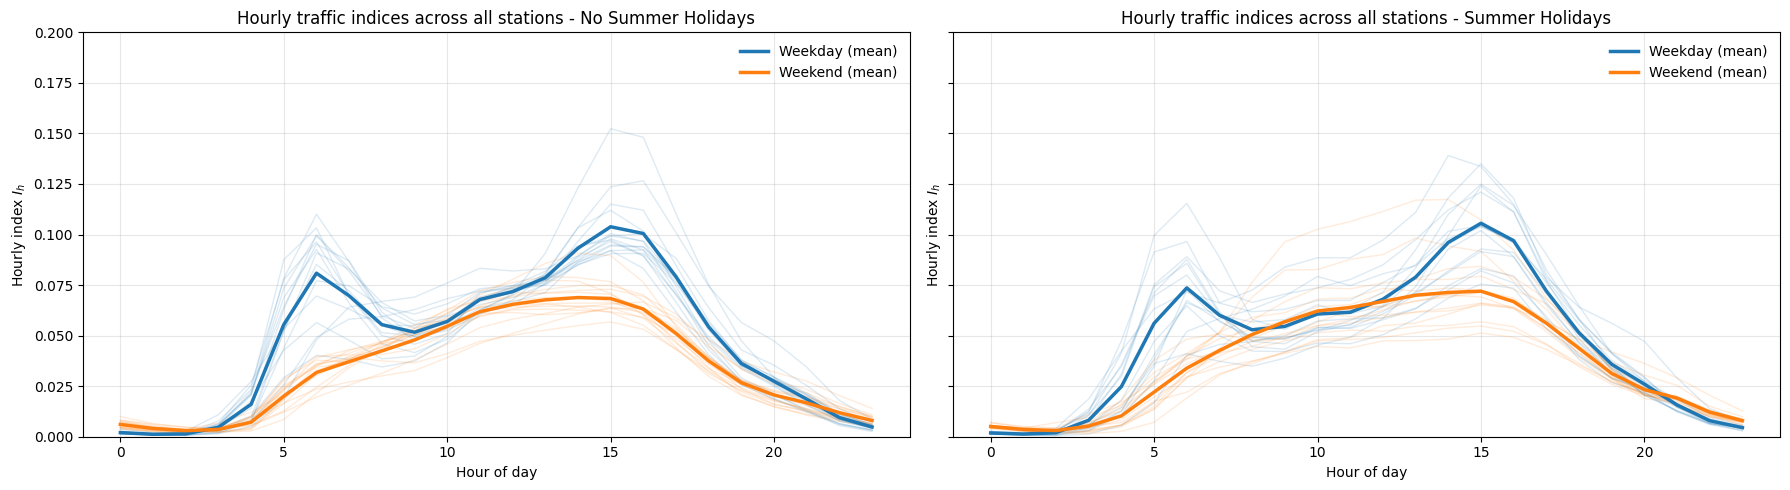

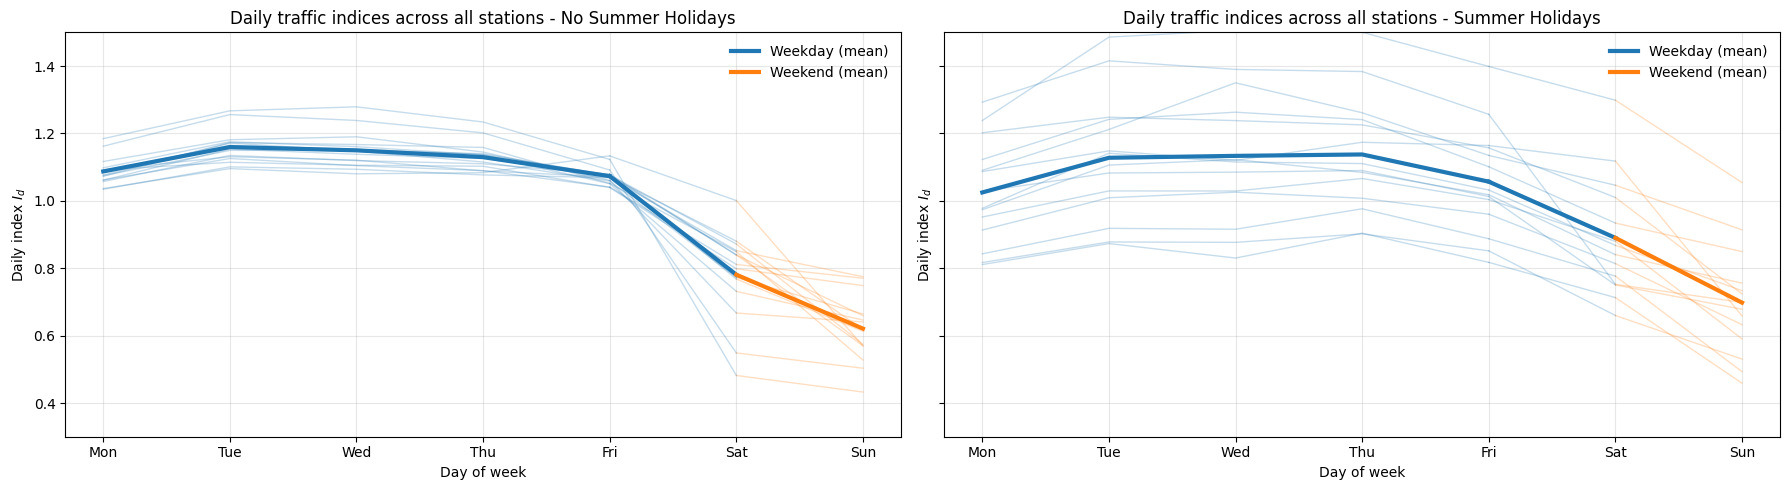

In [4]:
# This are all summer holidays.
intervals = dl.get_all_holiday_intervals(name="Sommer", school_vacation=True, public_holidays=False)

plot_hourly_indices_all_subplots(
    dl,
    filter_dates=intervals,
    neg_dates=True,
    title_1="Hourly traffic indices across all stations - No Summer Holidays",
    title_2="Hourly traffic indices across all stations - Summer Holidays"
)

plot_daily_indices_all_subplots(
    dl,
    filter_dates=intervals,
    title_1="Daily traffic indices across all stations - No Summer Holidays",
    title_2="Daily traffic indices across all stations - Summer Holidays"
)

During summer holidays where also many working people take their holidays, mid day activity raises, and the morning peaks drops slightly. But the left graph also contains the winter months, interpret with caution.

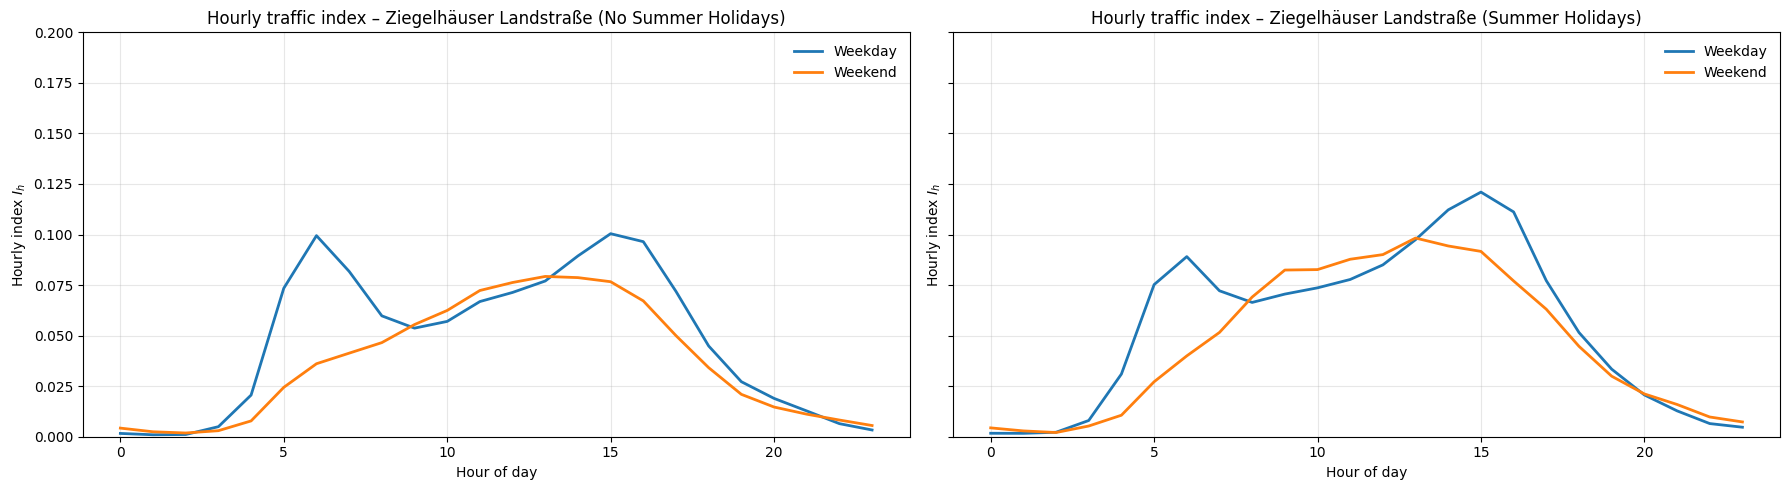

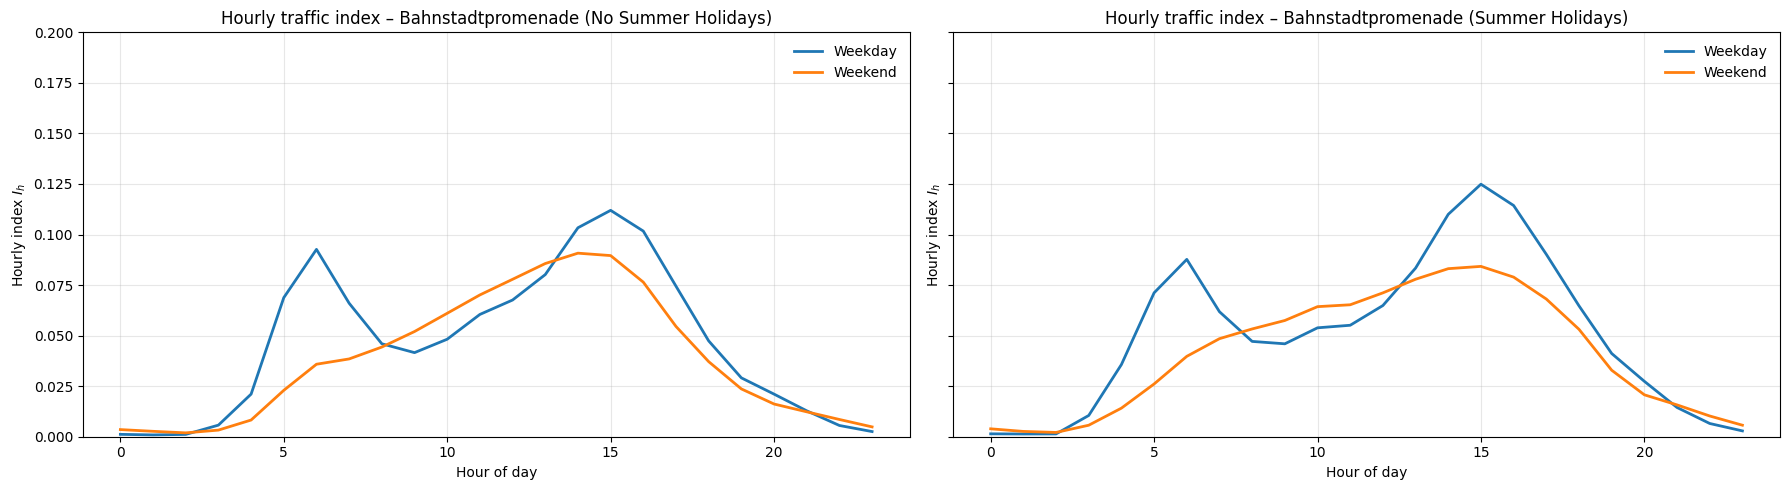

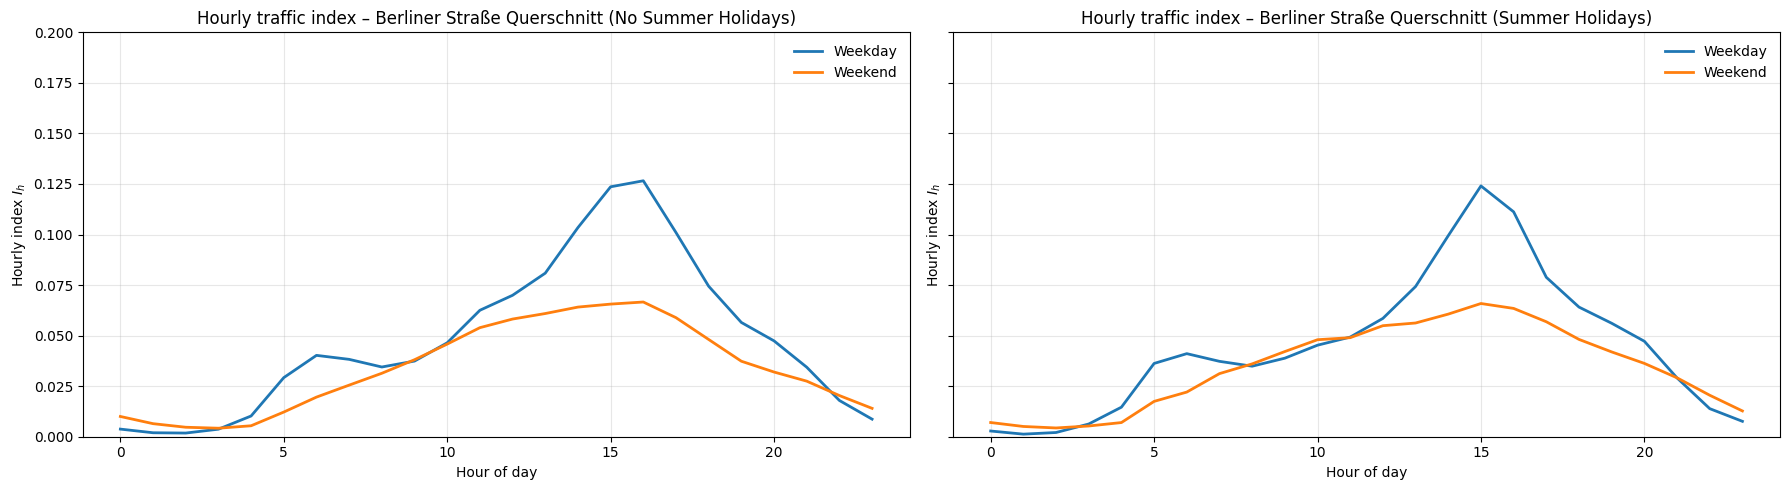

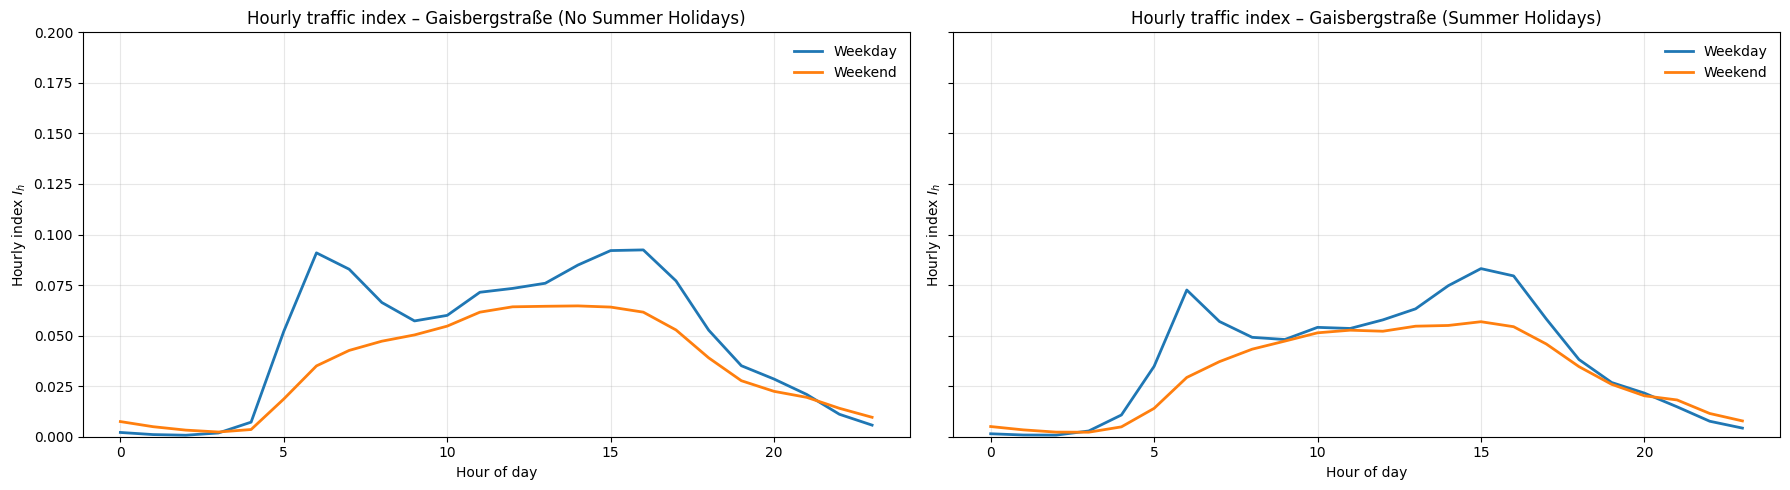

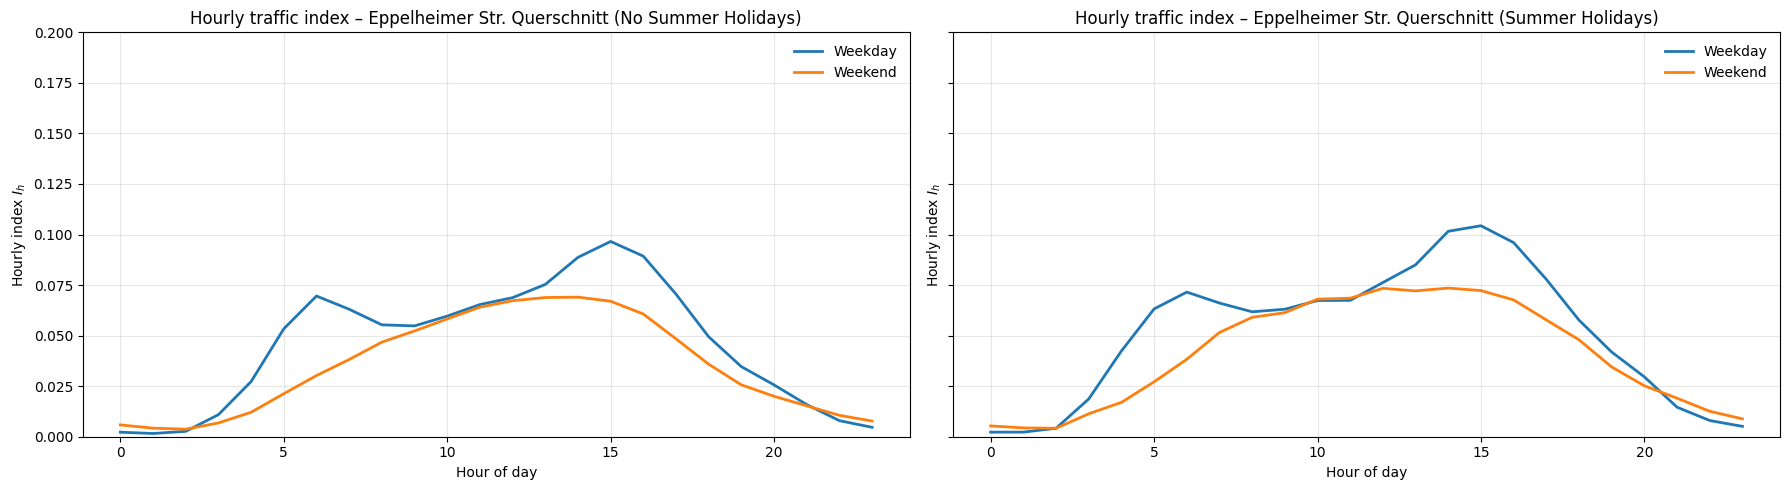

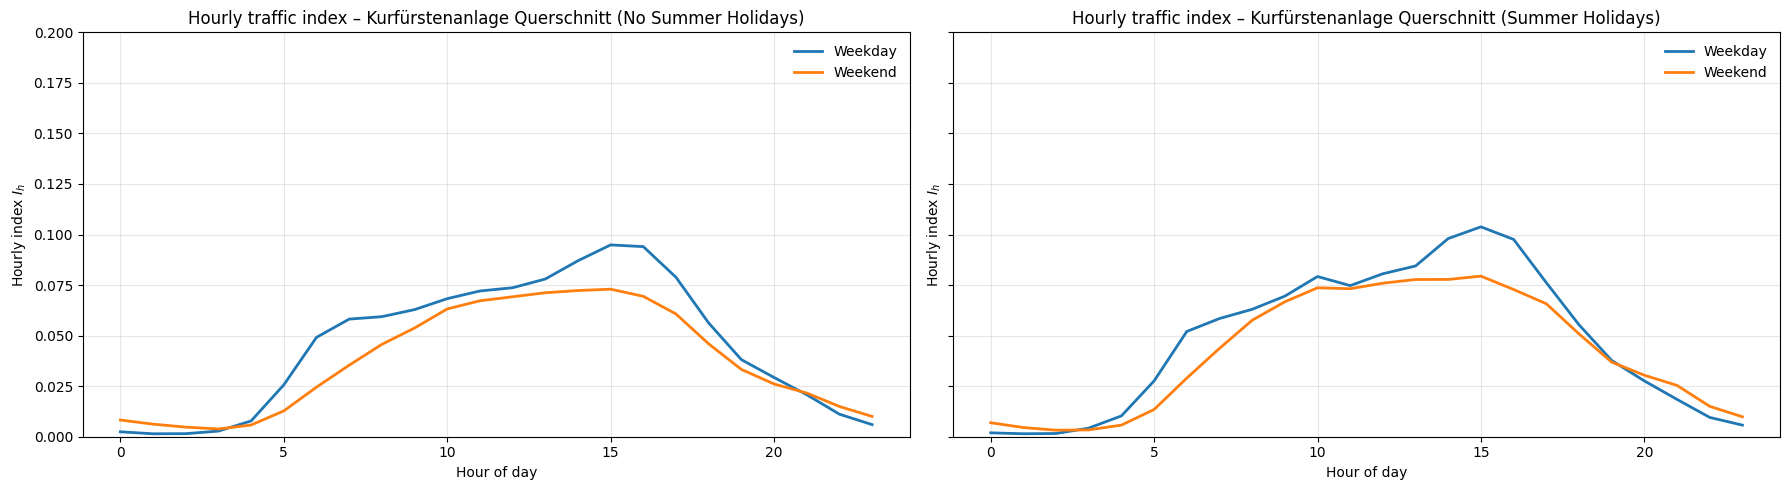

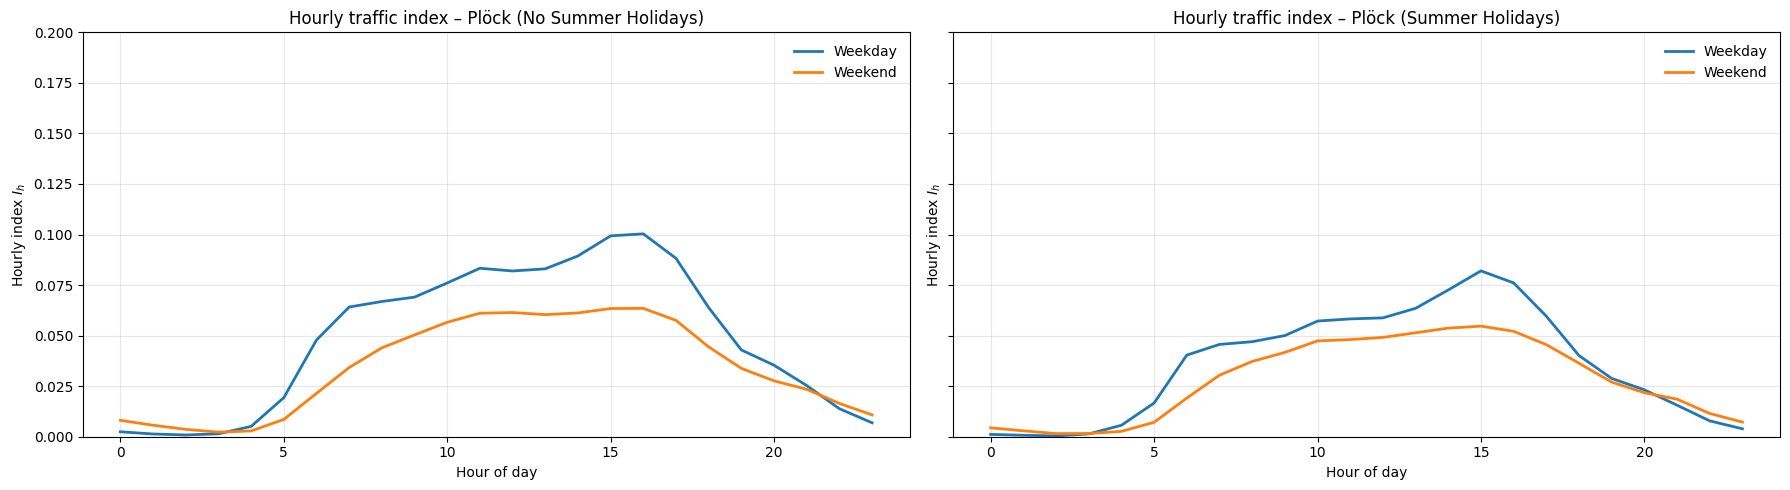

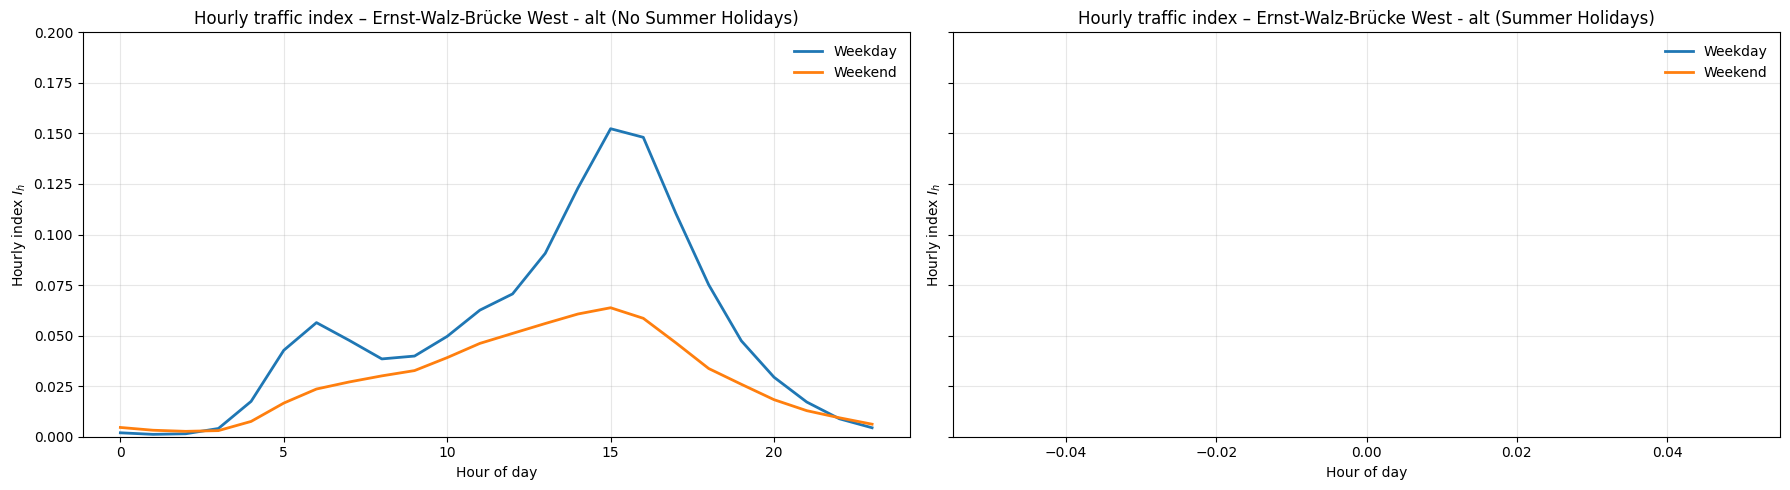

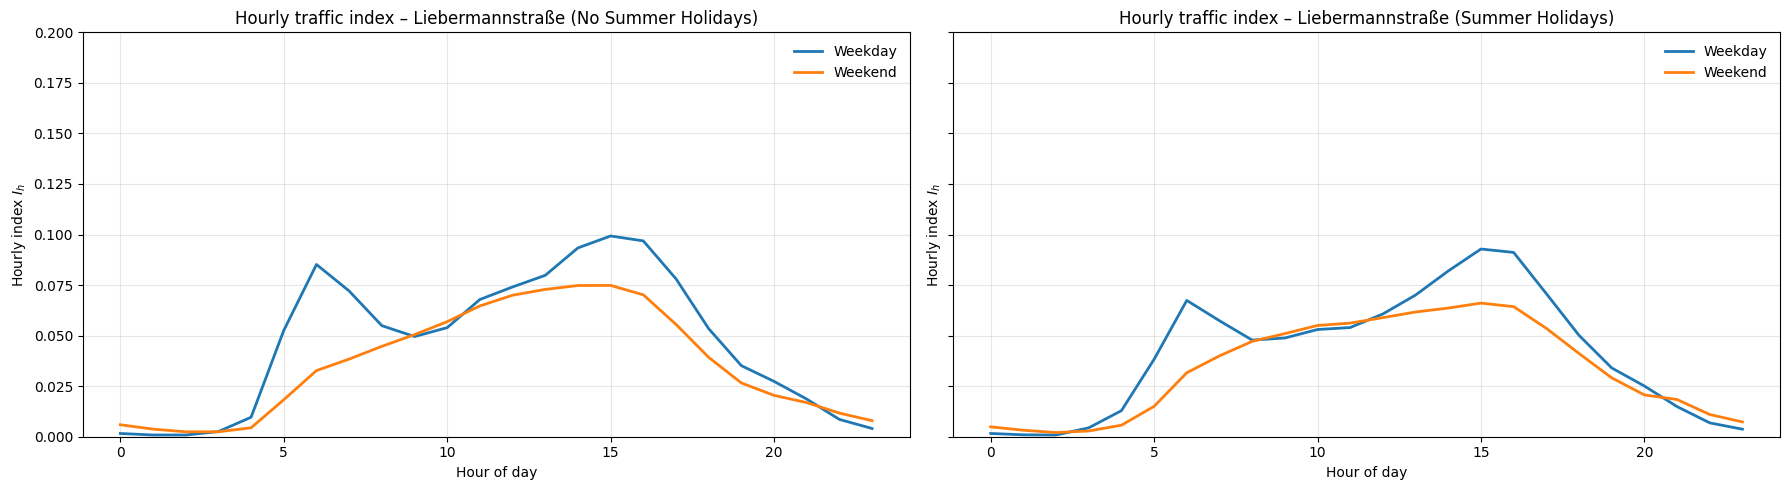

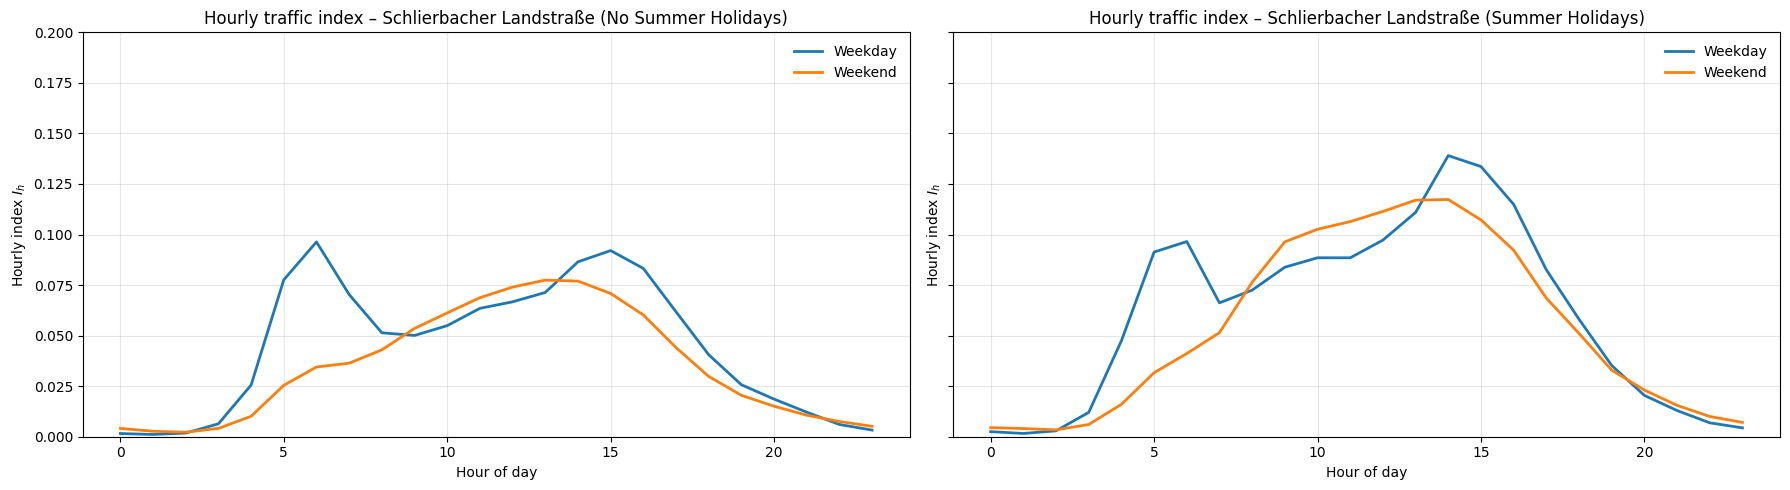

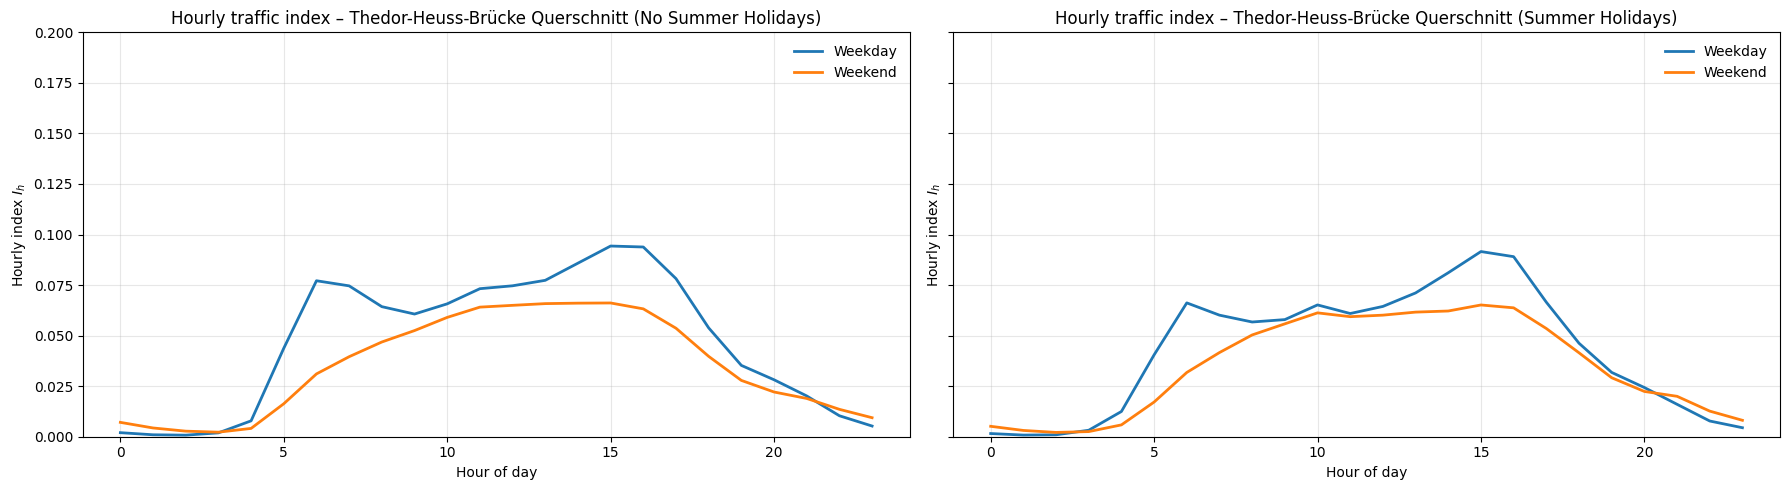

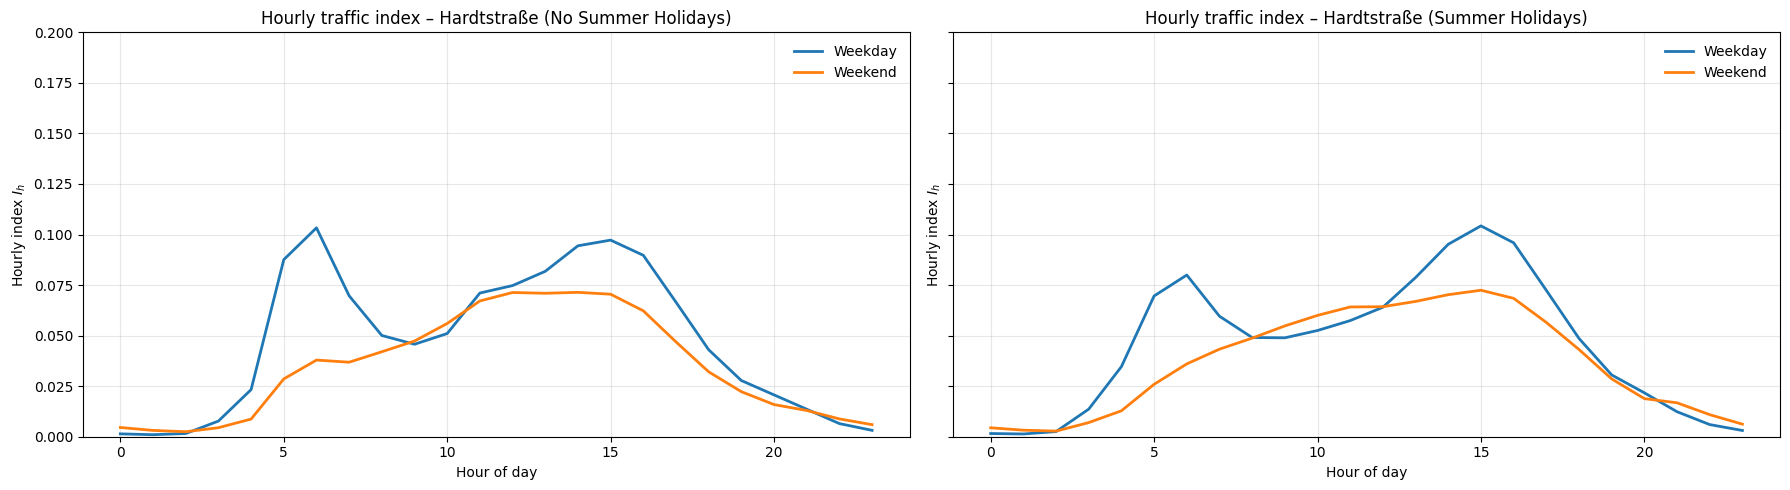

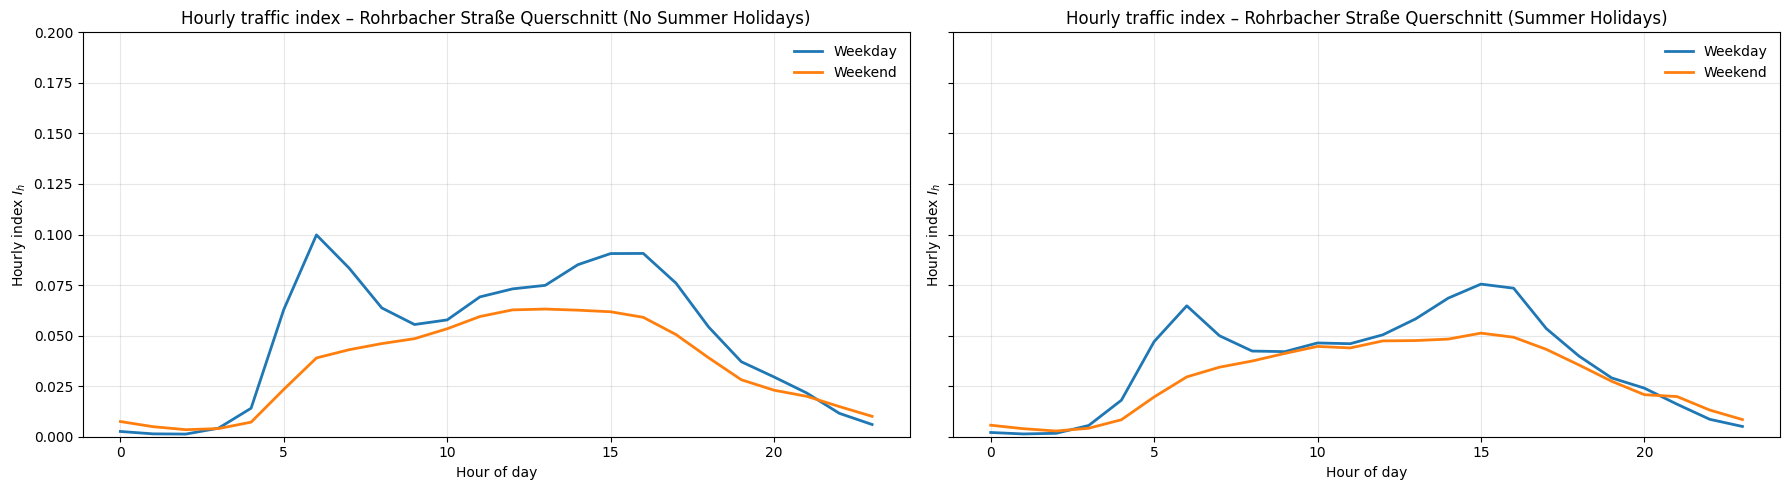

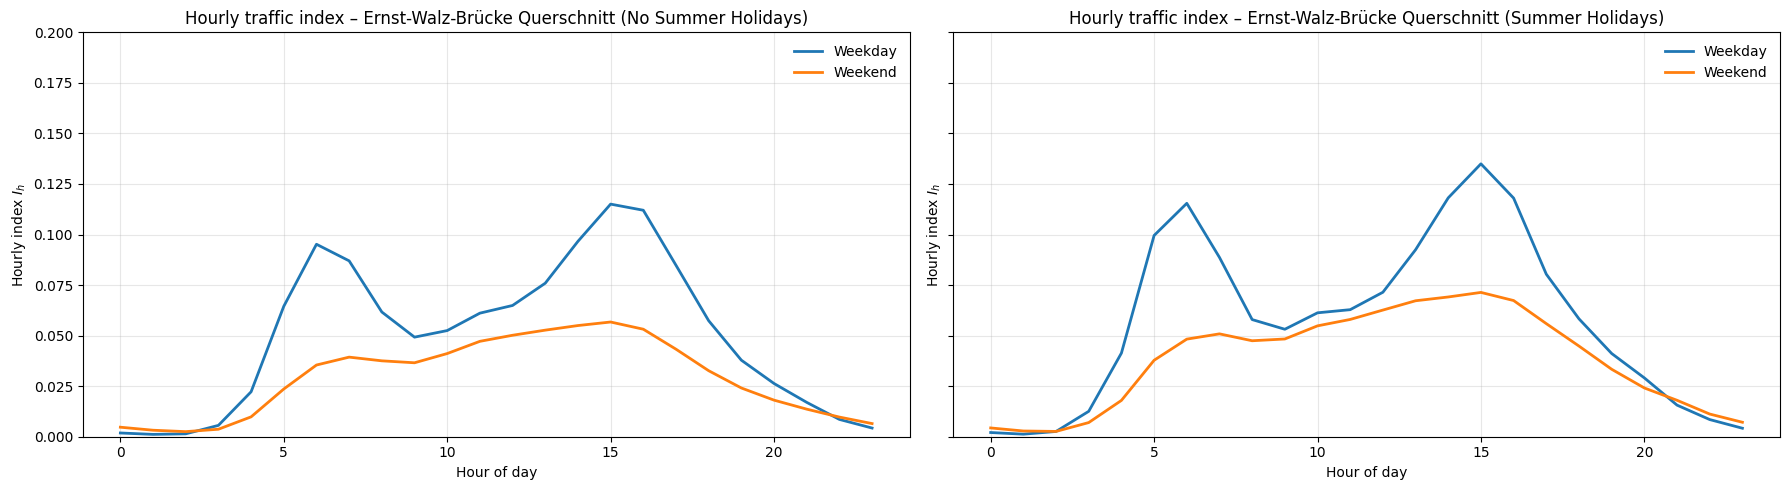

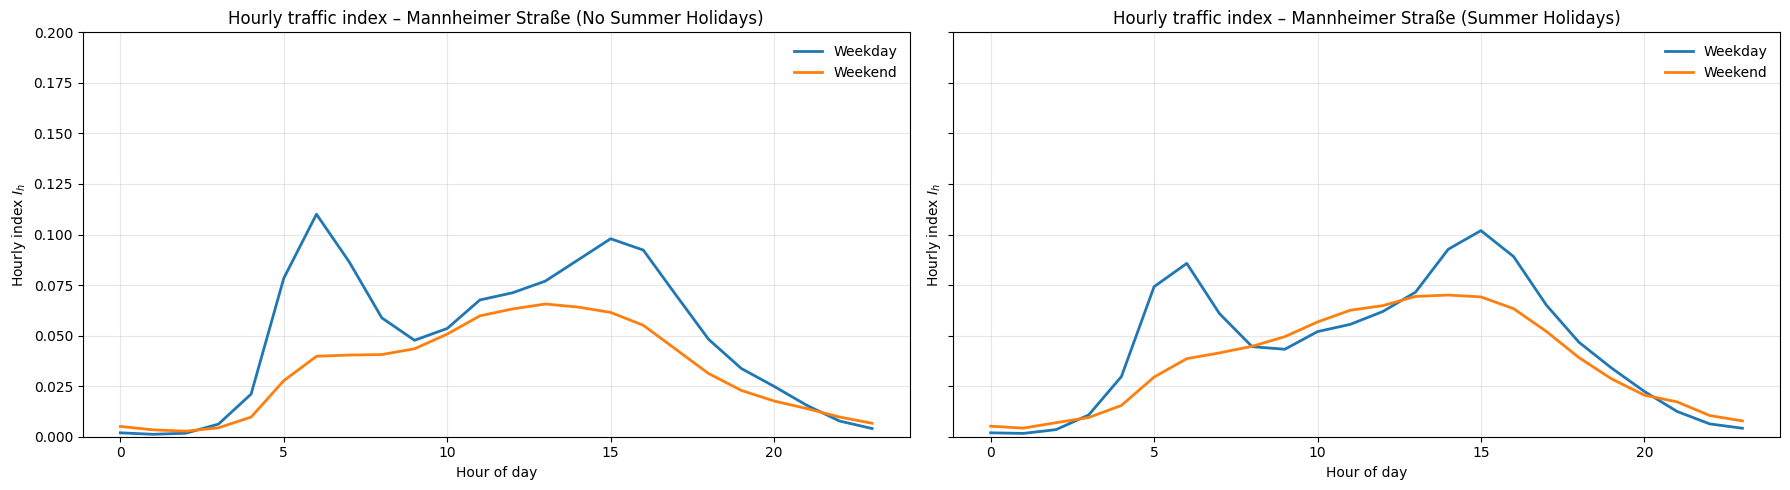

In [5]:
for station in dl.get_bicyle_stations():
  plot_hourly_indices_subplots(loader=dl, station_name=station, channel="channels_all", interval=None, ylim=(0, 0.2), show_metrics=False, title_1="(No Summer Holidays)", title_2="(Summer Holidays)", filter_dates=intervals, neg_dates=True)

Rohrbacherstraße looks really strange, if the normalized counts should add up to one, something is off here. But in general, in the Summerholidays there is a drop in the normal working peaks, increased mid day activity, moving all classes closer to mixed.

### Winter Holidays vs No Winter Holidays

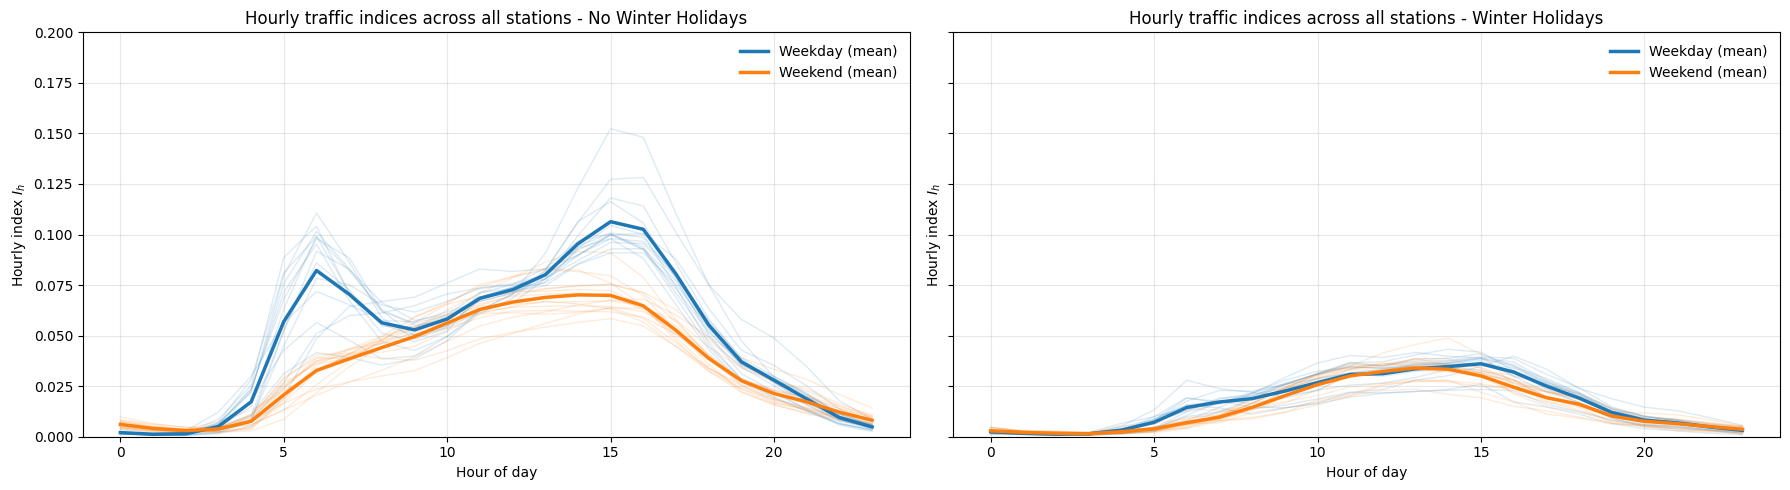

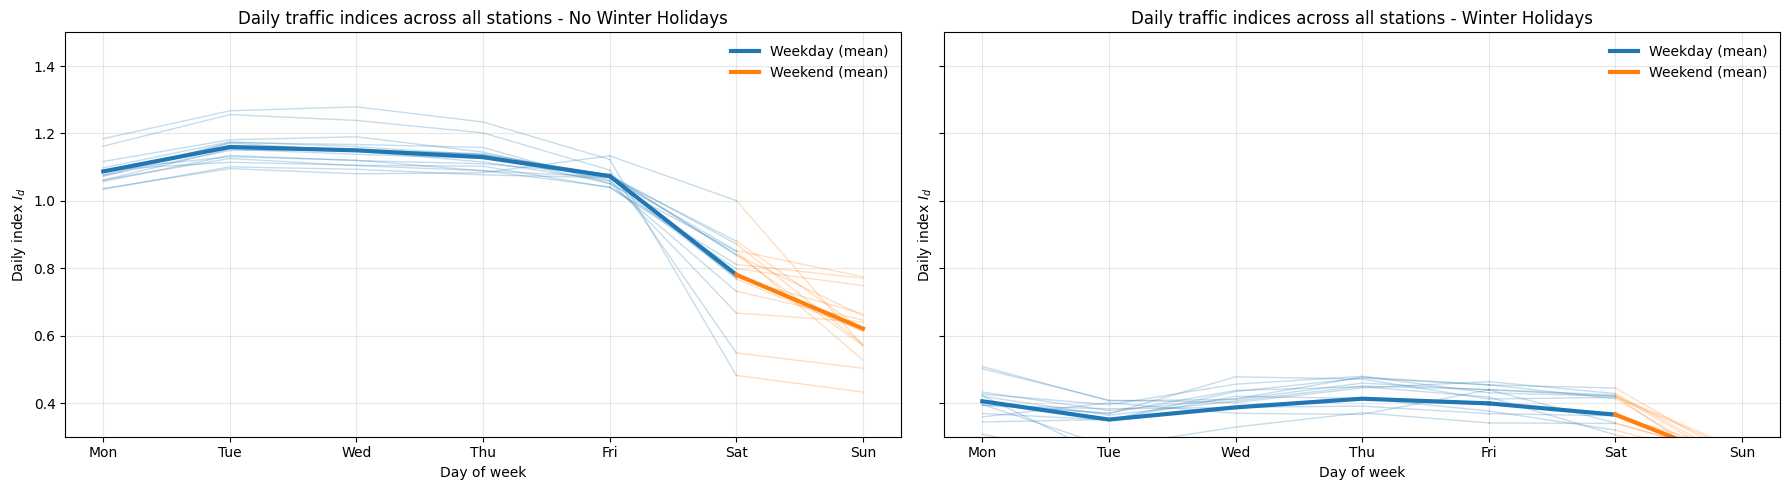

In [6]:
# This are all summer holidays.
intervals = dl.get_all_holiday_intervals(name="Weihnachten", school_vacation=True, public_holidays=False)

plot_hourly_indices_all_subplots(
    dl,
    filter_dates=intervals,
    neg_dates=True,
    title_1="Hourly traffic indices across all stations - No Winter Holidays",
    title_2="Hourly traffic indices across all stations - Winter Holidays"
)

plot_daily_indices_all_subplots(
    dl,
    filter_dates=intervals,
    title_1="Daily traffic indices across all stations - No Winter Holidays",
    title_2="Daily traffic indices across all stations - Winter Holidays"
)

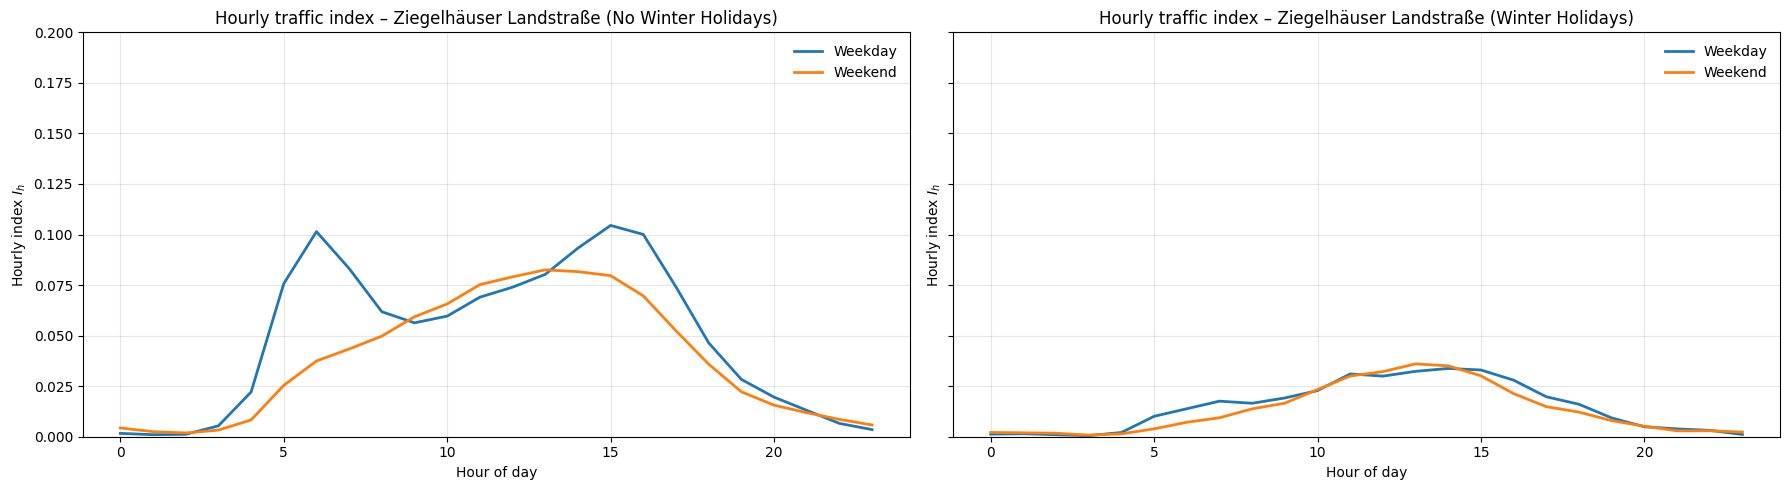

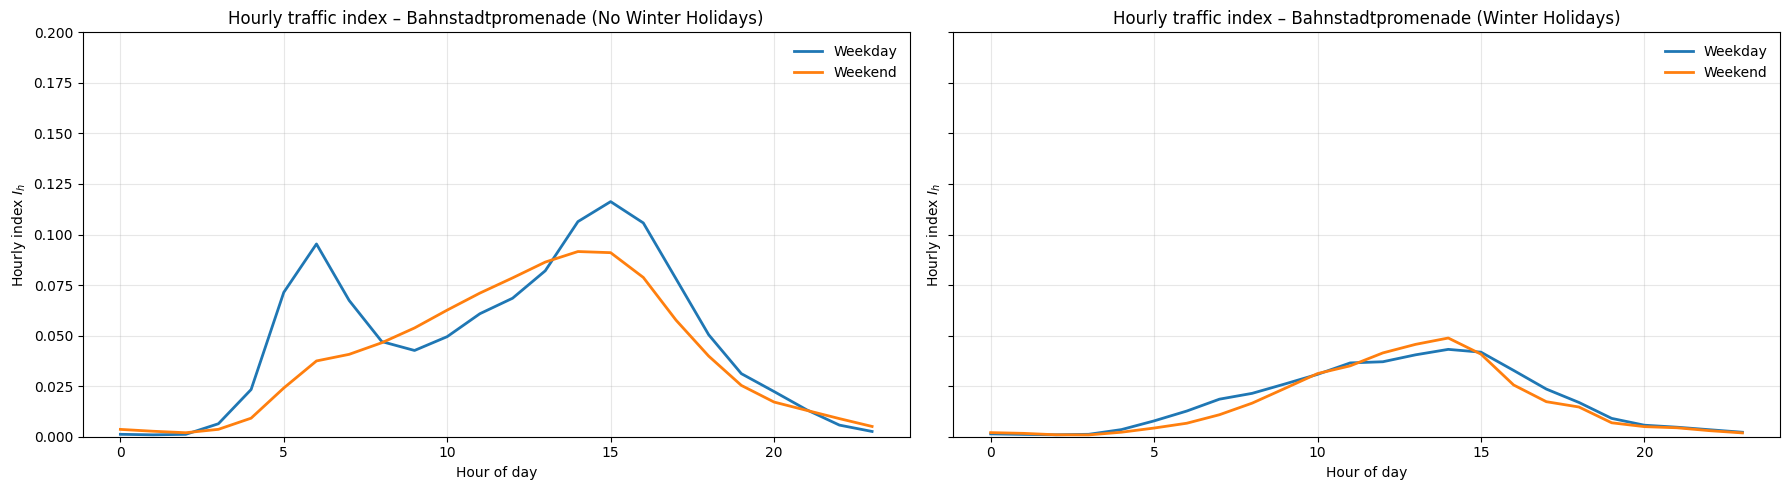

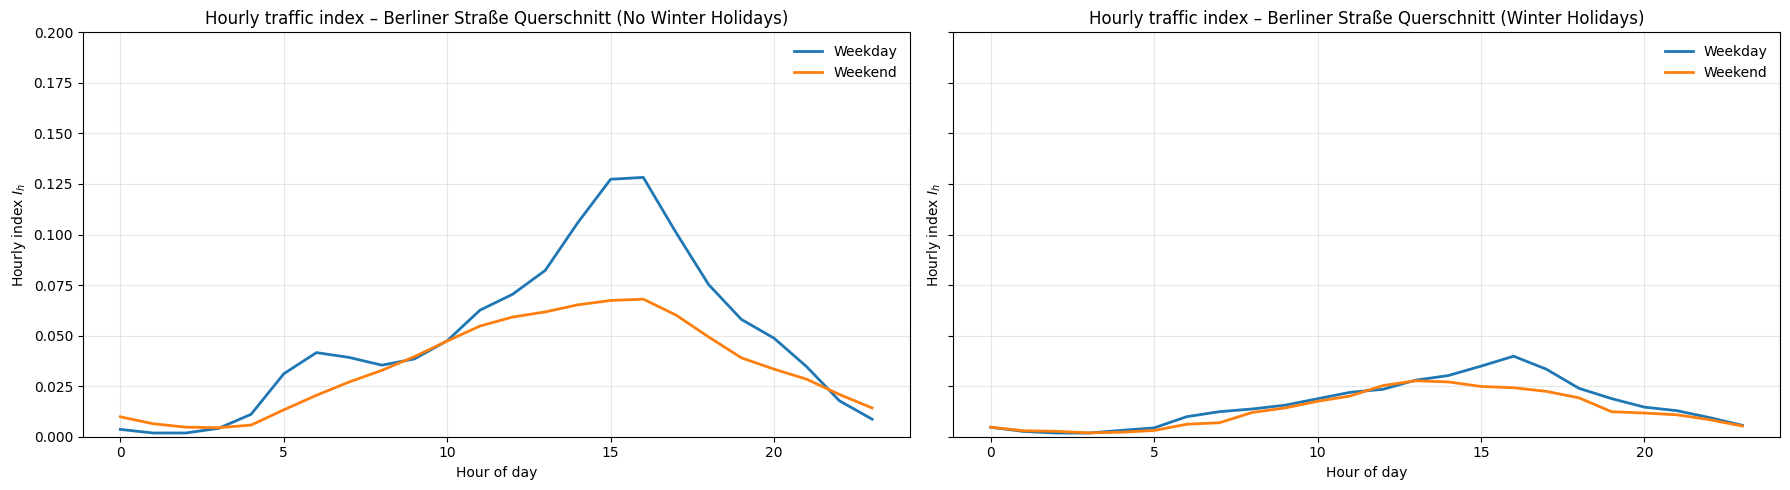

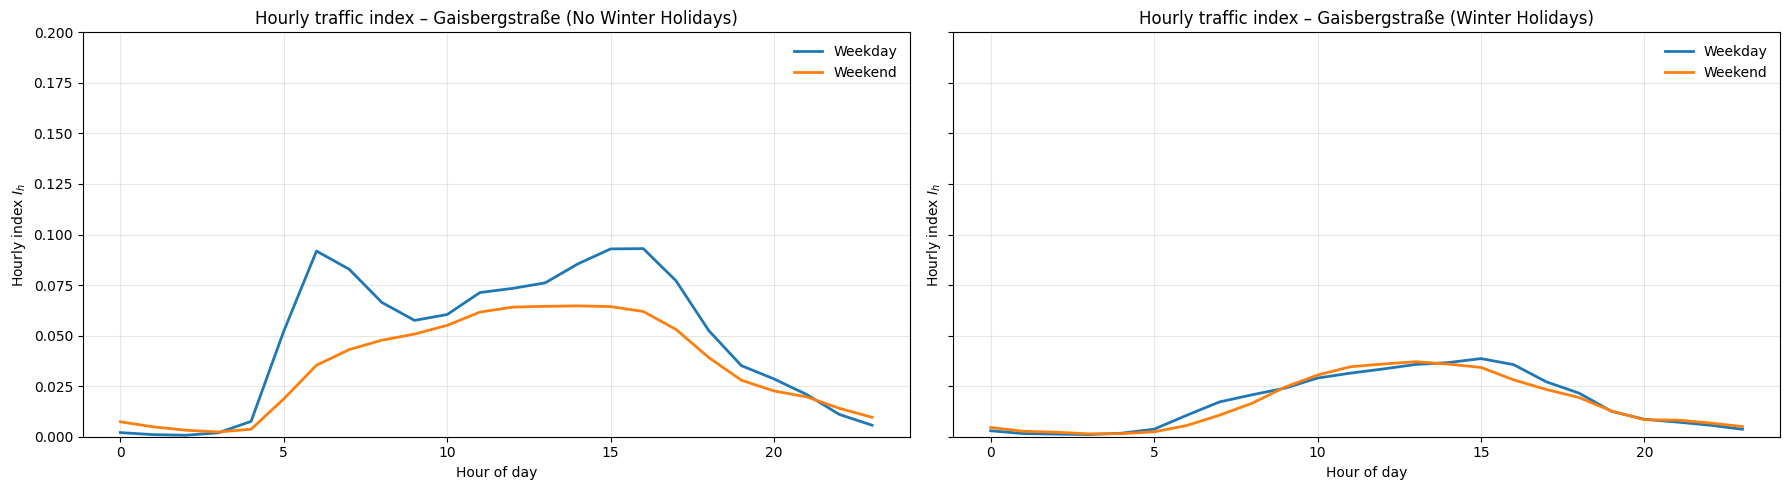

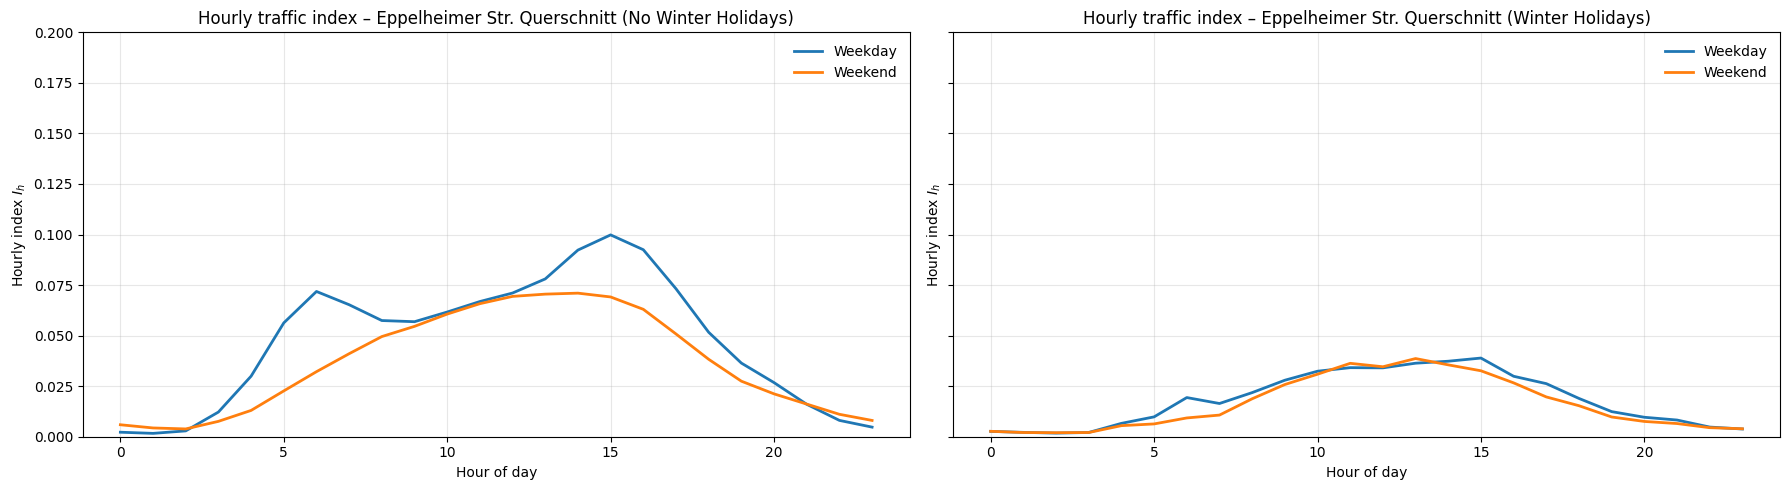

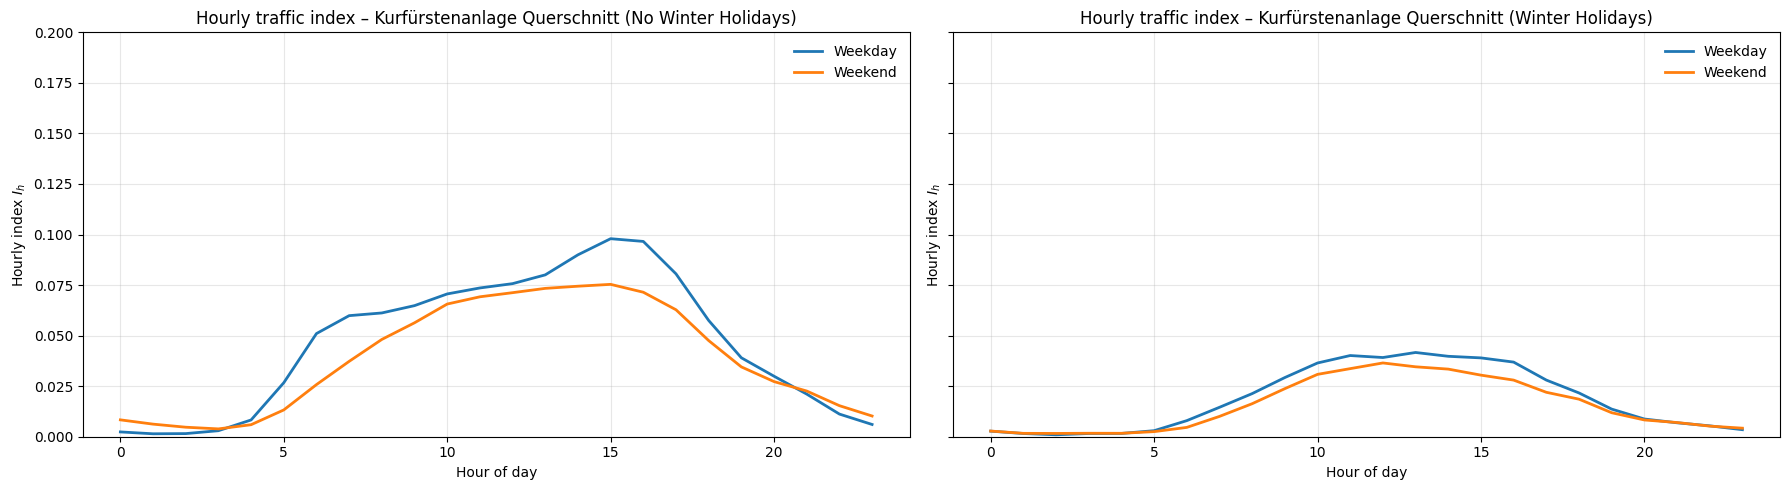

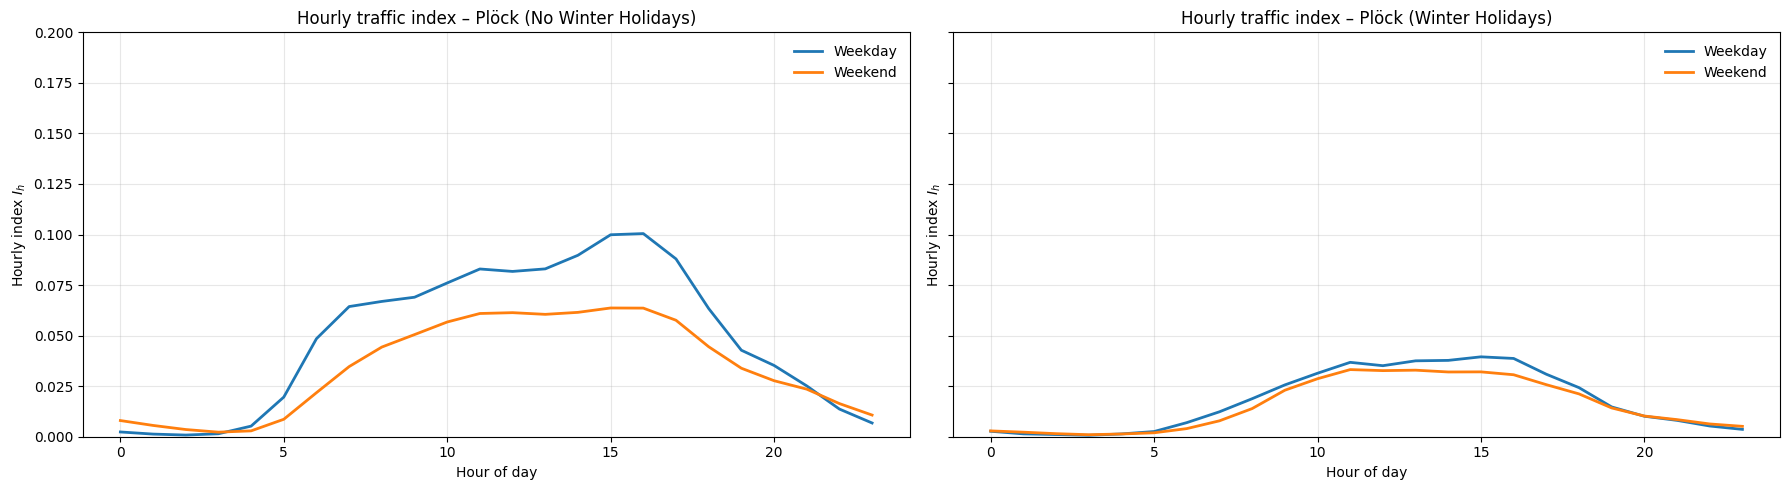

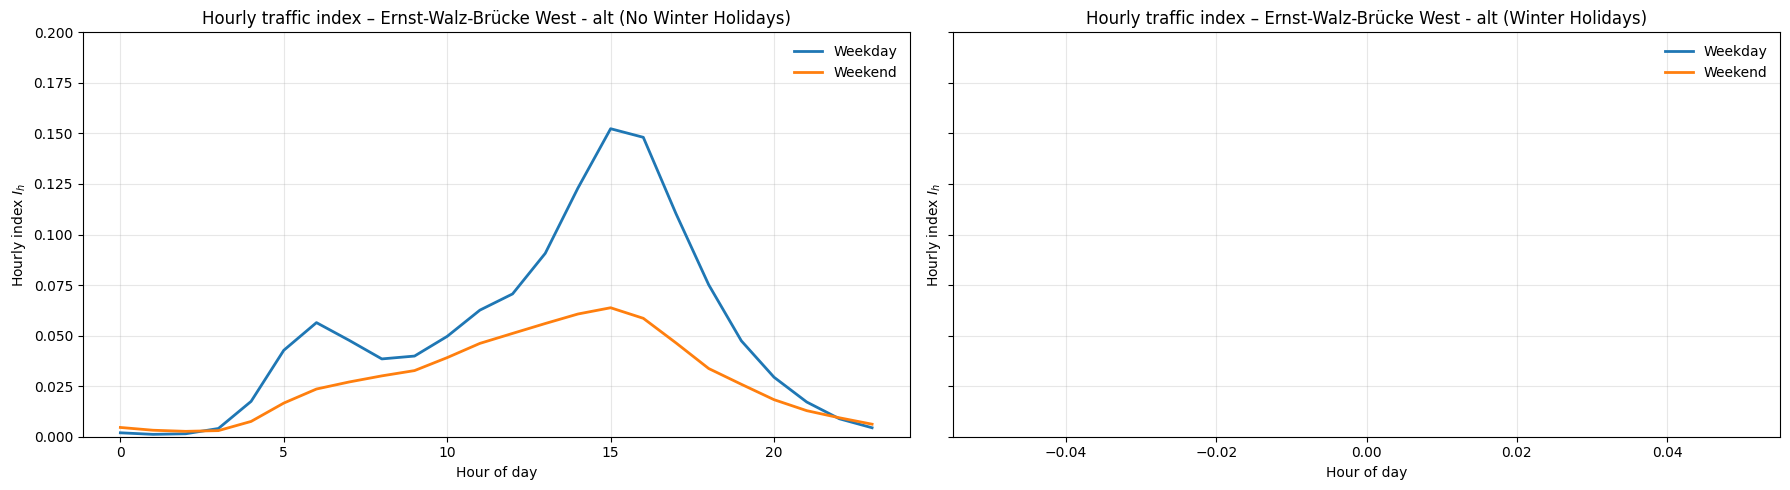

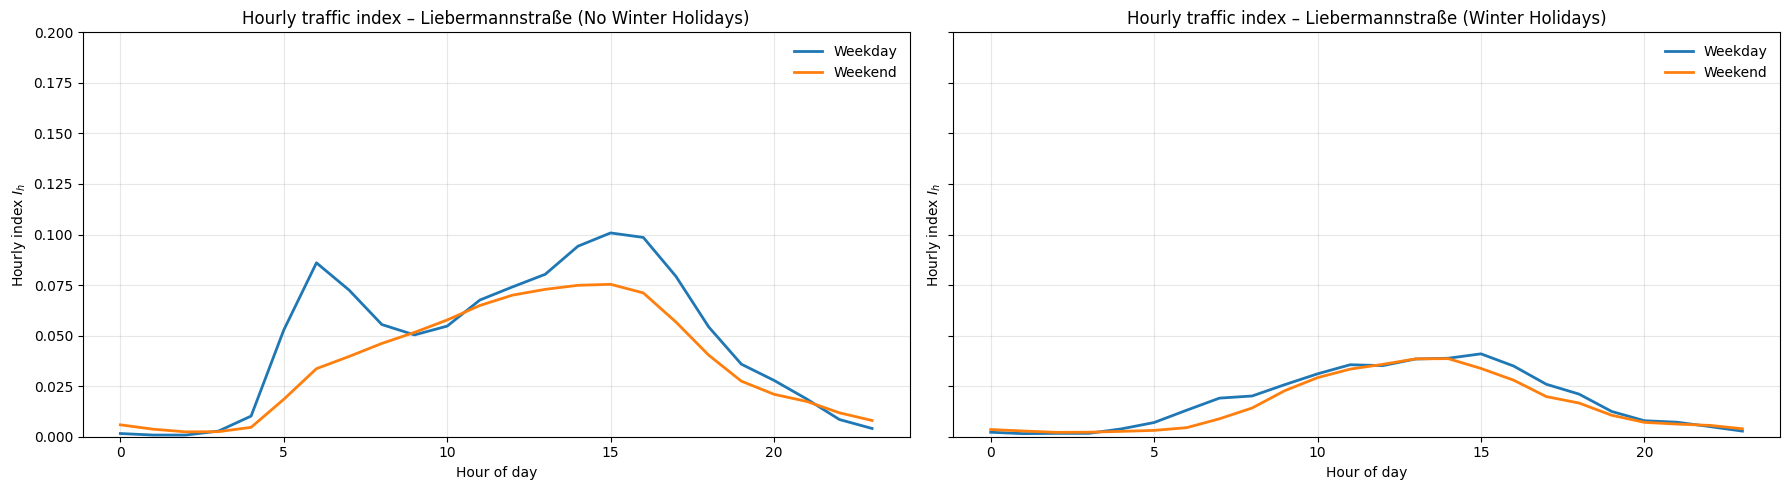

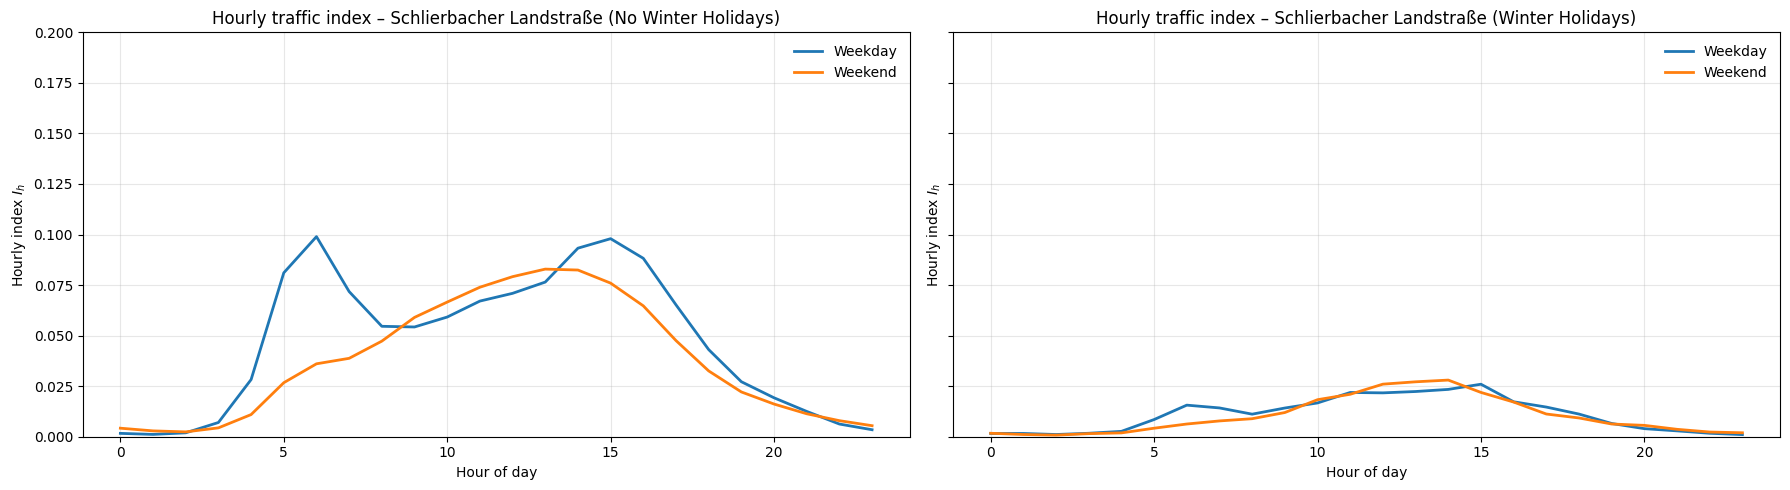

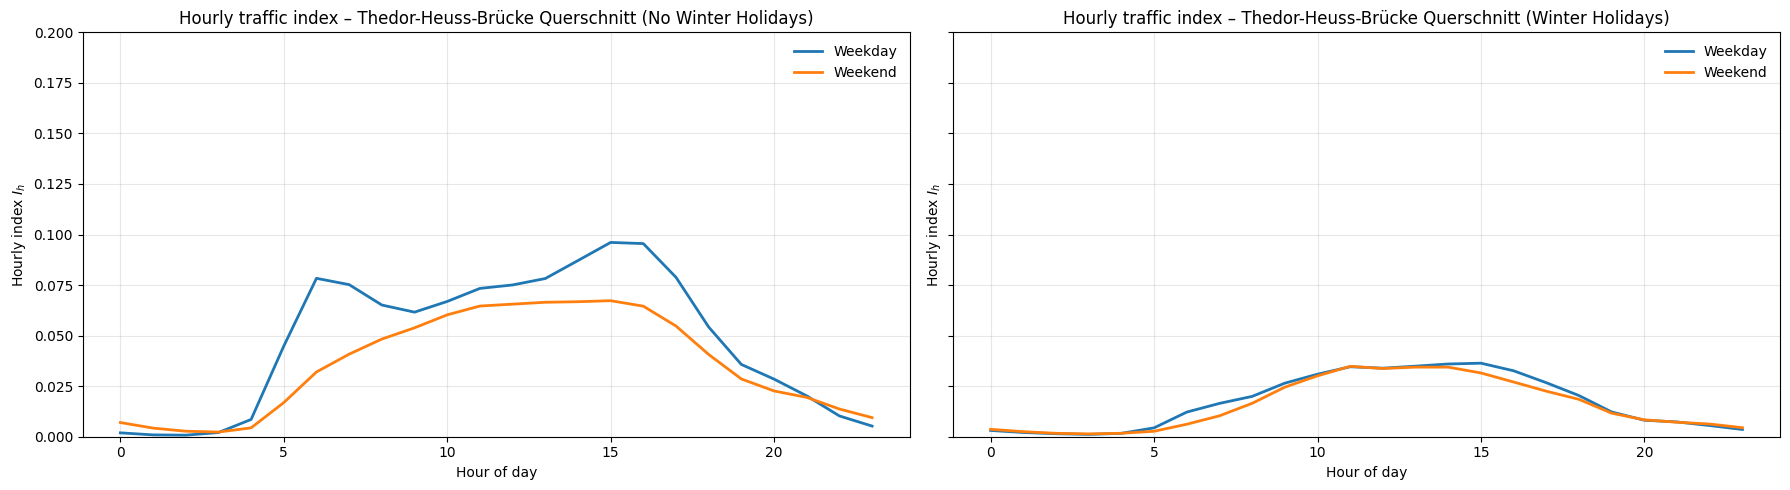

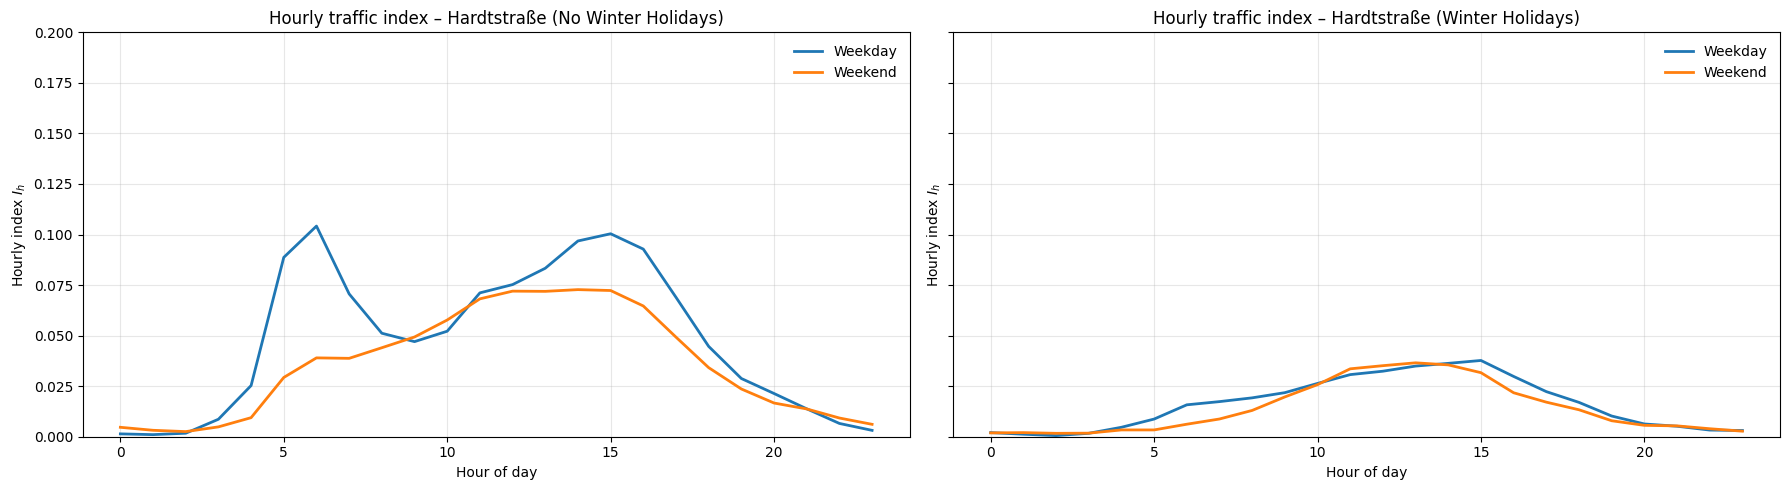

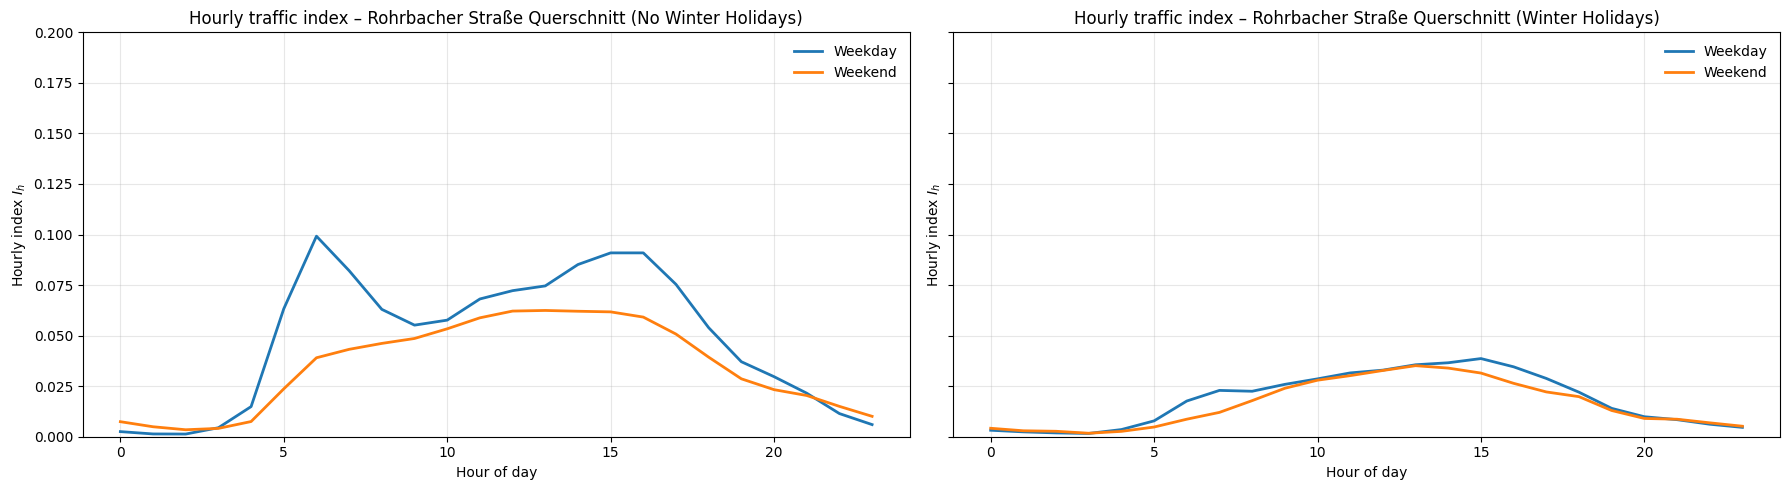

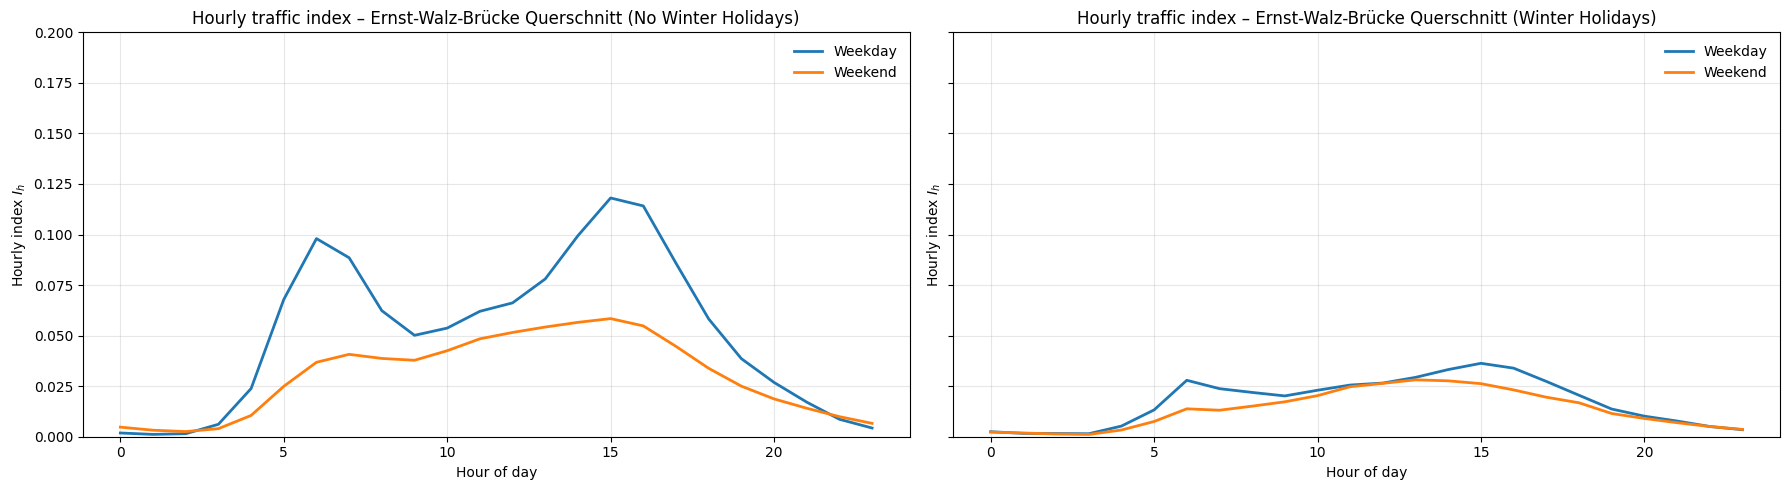

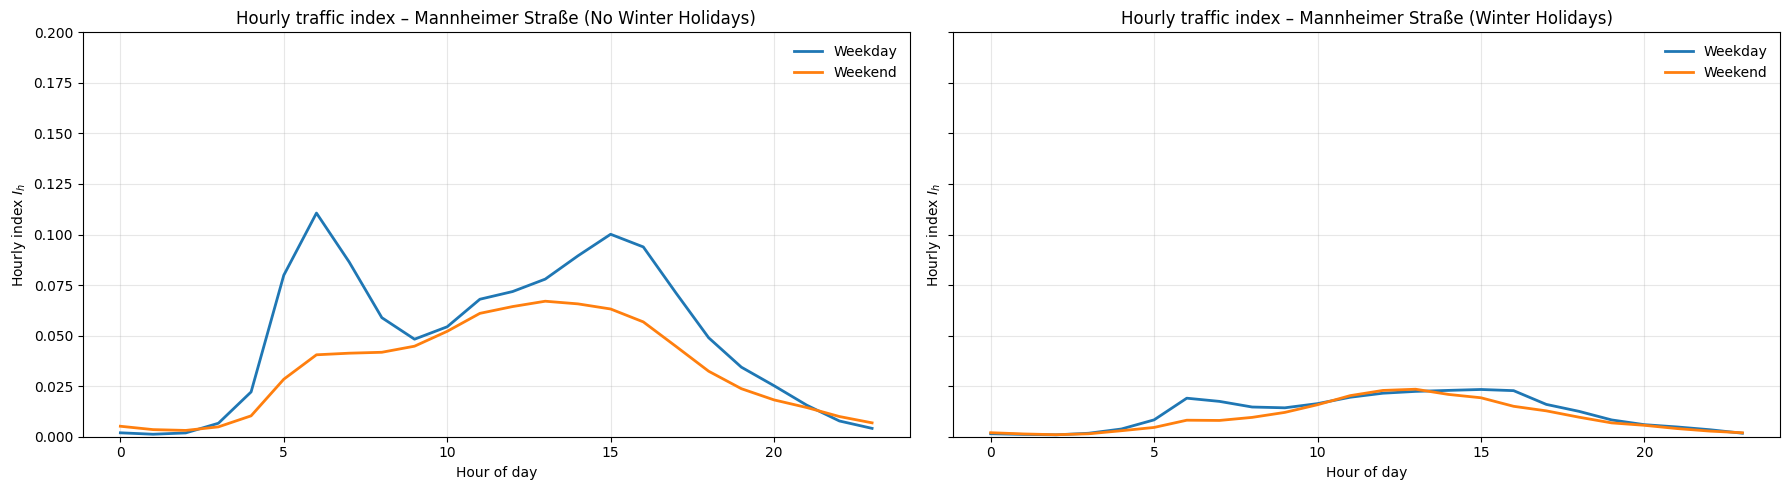

In [7]:
for station in dl.get_bicyle_stations():
  plot_hourly_indices_subplots(loader=dl, station_name=station, channel="channels_all", interval=None, ylim=(0, 0.2), show_metrics=False, title_1="(No Winter Holidays)", title_2="(Winter Holidays)", filter_dates=intervals, neg_dates=True)

Most people are taking their holidays almost over the complete christmas break.

### What's the most popular public holiday?

In [8]:
# This are all public holidays.
holidays = {}
intervals = dl.get_all_holiday_intervals(school_vacation=False)

for station in dl.get_bicyle_stations():
    df = dl.get_bicycle(station, sample_rate="1d").filter_intervals(intervals).to_pandas()

    for idx, row in df.iterrows():
        date = row['datetime'].date()
        holiday_info = dl.get_public_holiday(date.strftime("%Y-%m-%d"))
        if len(holiday_info) > 0:
            name = holiday_info['name'][0]
            holidays[name] = holidays.get(name, 0) + row['channels_all']

for name, count in holidays.items():
    print(f"{name}: {count} Radfahrer")

Neujahrstag: 55535 Radfahrer
Heilige Drei Könige: 73642 Radfahrer
Gründonnerstag: 158102 Radfahrer
Karfreitag: 115378 Radfahrer
Ostermontag: 89170 Radfahrer
Tag der Arbeit: 164098 Radfahrer
Christi Himmelfahrt: 185951 Radfahrer
Pfingstmontag: 168636 Radfahrer
Fronleichnam: 154795 Radfahrer
Reformationstag: 144254 Radfahrer
Allerheiligen: 106064 Radfahrer
1. Weihnachtstag: 25941 Radfahrer
2. Weihnachtstag: 29336 Radfahrer
Tag der Deutschen Einheit: 109924 Radfahrer


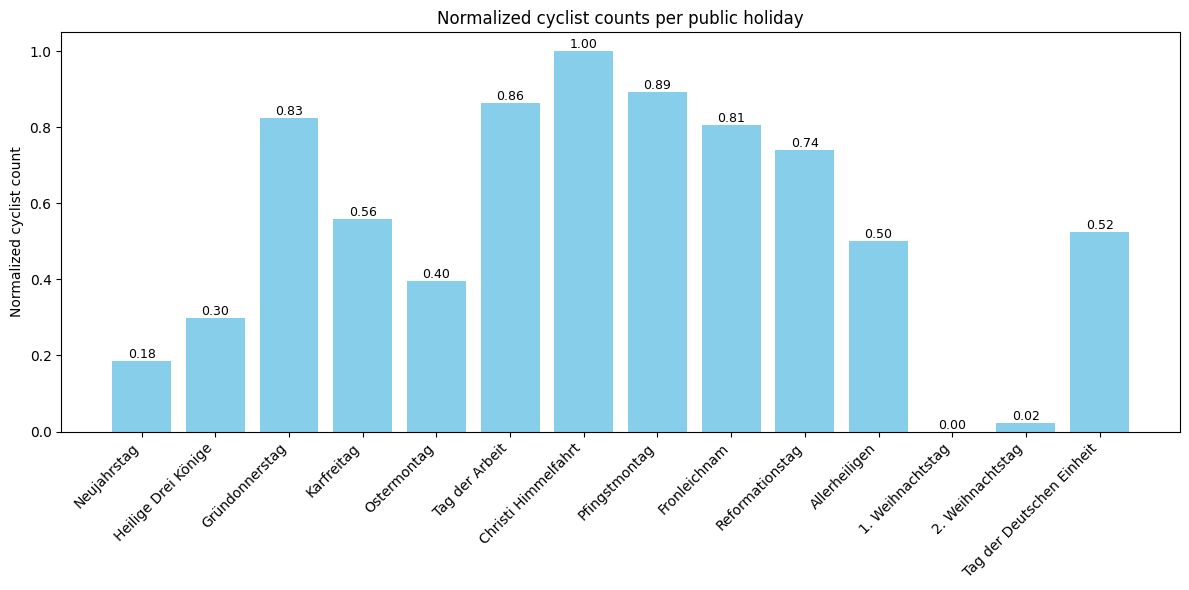

In [9]:
import matplotlib.pyplot as plt
import numpy as np

names = list(holidays.keys())
counts = np.array([holidays[name] for name in names])

counts_norm = (counts - counts.min()) / (counts.max() - counts.min())

plt.figure(figsize=(12, 6))
bars = plt.bar(names, counts_norm, color='skyblue')
plt.ylabel("Normalized cyclist count")
plt.title("Normalized cyclist counts per public holiday")
plt.xticks(rotation=45, ha='right')

for bar, count in zip(bars, counts_norm):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{count:.2f}", 
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

### Station Usage Patterns

To quantify the impact of public holidays on station usage patterns, we compare feature vectors computed from holiday periods with a baseline excluding holidays and analyse the resulting changes in the Double Peak Index (ΔDPI) and the Weekend Shape Difference (ΔWSD).


In [10]:
from analysis.visualization.characterisation.event import compute_event_deltas

holiday_intervals = dl.get_all_holiday_intervals(school_vacation=False)

delta_df = (
    compute_event_deltas(loader=dl, intervals=holiday_intervals)
    .select(["station", "DPI_delta", "WSD_delta"])
)

In [11]:
from analysis.visualization.characterisation.helpers import impact_by_usage, label_deltas_with_usage

delta_labeled = label_deltas_with_usage(delta_df=delta_df, usage_probs=usage_probs)
impact_holiday = impact_by_usage(delta_labeled=delta_labeled)

impact_holiday

shape: (0, 0)
┌┐
╞╡
└┘

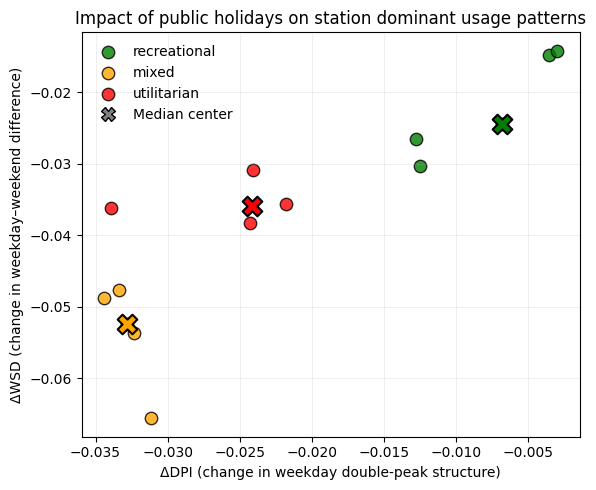

In [12]:
from analysis.visualization.characterisation.plotting import plot_holiday_impact

plot_holiday_impact(delta_labeled=delta_labeled)


Overall effects
- **ΔDPI < 0 for all stations:** Weekday morning and evening commuter peaks are weakened during public holidays.
- **ΔWSD < 0 for all stations:** Weekday traffic patterns become more similar to weekend profiles.

Mixed-use stations exhibit the largest absolute holiday-induced change in feature space

Recreational shows lowest change

### Utilitarian Score of Stations

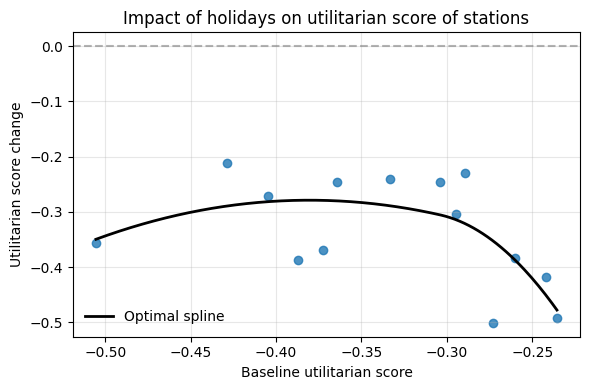

{'n_stations': 14,
 's_opt': np.float64(0.06498224367057888),
 'mse': np.float64(0.007467218012487594)}

In [13]:
from analysis.visualization.characterisation.plotting import plot_event_utilitarian_spline
plot_event_utilitarian_spline(loader=dl, intervals=holiday_intervals, title="Impact of holidays on utilitarian score of stations", k = 2)